In [103]:
import simplejson as json
import requests # http lib
import pysftp # sftp lib
import base64 #... base64 lib
from pprint import pprint # garbage
from geolite2 import geolite2 # ip geolocation lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls

# plotting-related imports:
import folium

In [2]:
with pysftp.Connection('13.58.190.48', username='ubuntu', private_key='blackbird_pub.pem') as sftp:
    #sftp.get('/home/ubuntu/test')
    sftp.get('/home/ubuntu/honeypot/results/kako.json')

In [3]:
raw_file = open('kako.json','r')
raw_captures = raw_file.readlines() # list of all json docs - as strings

In [4]:
all_captures = []
for cap in raw_captures:
    all_captures.append(json.loads(cap)) # converts str to json

In [169]:
locations = []
reader = geolite2.reader()
i=0
for cap in all_captures:
    src_ip = cap['source_ip']
    match = reader.get(src_ip)
    if match is not None:
        if match['location']['latitude'] is not None and match['location']['longitude'] is not None:
            #pprint(match)
            #print("\n\n\n\n\n\n\n")
            if 'city' in match and 'location' in match and 'country' in match:
               locations.append({
                                'lat': match['location']['latitude'], 
                                'lon': match['location']['longitude'],
                                'city': match['city']['names']['en'],
                                'country': match['country']['names']['en'],
                                'sim': cap['simulation_name'],
                                'dest_port': int(cap['destination_port']),
                                'iso_code': match['country']['iso_code']
                                } )
            


{'city': {'geoname_id': 1796236,
          'names': {'de': 'Shanghai',
                    'en': 'Shanghai',
                    'es': 'Shanghai',
                    'fr': 'Shanghai',
                    'ja': '上海',
                    'pt-BR': 'Xangai',
                    'ru': 'Шанхай',
                    'zh-CN': '上海'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 

                   'names': {'en': 'Shanghai',
                             'fr': 'Municipalité de Shanghai',
                             'pt-BR': 'Xangai',
                             'zh-CN': '上海'}}]}
{'city': {'geoname_id': 1796236,
          'names': {'de': 'Shanghai',
                    'en': 'Shanghai',
                    'es': 'Shanghai',
                    'fr': 'Shanghai',
                    'ja': '上海',
                    'pt-BR': 'Xangai',
                    'ru': 'Шанхай',
                    'zh-CN': '上海'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             '

                    'en': 'Shanghai',
                    'es': 'Shanghai',
                    'fr': 'Shanghai',
                    'ja': '上海',
                    'pt-BR': 'Xangai',
                    'ru': 'Шанхай',
                    'zh-CN': '上海'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       '

                    'es': 'Shanghai',
                    'fr': 'Shanghai',
                    'ja': '上海',
                    'pt-BR': 'Xangai',
                    'ru': 'Шанхай',
                    'zh-CN': '上海'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accurac

                             'zh-CN': '敖德萨州'}}]}
{'city': {'geoname_id': 3448439,
          'names': {'de': 'São Paulo',
                    'en': 'São Paulo',
                    'es': 'São Paulo',
                    'fr': 'São Paulo',
                    'ja': 'サンパウロ',
                    'pt-BR': 'São Paulo',
                    'ru': 'Сан-Паулу'}},
 'continent': {'code': 'SA',
               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                         'en': 'South America',
                         'es': 'Sudamérica',
                         'fr': 'Amérique du Sud',
                         'ja': '南アメリカ',
                         'pt-BR': 'América do Sul',
                         'ru': 'Южная Америка',
                         'zh-CN': '南美洲'}},
 'country': {'geoname_id': 3469034,
             'iso_code': 'BR',
             'names': {'de': 'Brasilien',
                       'en': 'Brazil',
                       'es': 'Brasil',
                   

                       'zh-CN': '台湾'}},
 'location': {'accuracy_radius': 200,
              'latitude': 24.8036,
              'longitude': 120.9686,
              'time_zone': 'Asia/Taipei'},
 'registered_country': {'geoname_id': 1668284,
                        'iso_code': 'TW',
                        'names': {'de': 'Taiwan',
                                  'en': 'Taiwan',
                                  'es': 'Taiwán',
                                  'fr': 'Taïwan',
                                  'ja': '中華民国',
                                  'pt-BR': 'Taiwan',
                                  'ru': 'Тайвань',
                                  'zh-CN': '台湾'}},
 'subdivisions': [{'geoname_id': 1675103,
                   'iso_code': 'HSQ',
                   'names': {'en': 'Hsinchu', 'zh-CN': '新竹市'}}]}
{'city': {'geoname_id': 677697,
          'names': {'de': 'Galatz',
                    'en': 'Galați',
                    'es': 'Galați',
                    'fr': 'Gal

                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 798549,
             'is_in_european_union': True,
             'iso_code': 'RO',
             'names': {'de': 'Rumänien',
                       'en': 'Romania',
                       'es': 'Rumanía',
                       'fr': 'Roumanie',
                       'ja': 'ルーマニア',
                       'pt-BR': 'Romênia',
                       'ru': 'Румыния',
                       'zh-CN': '罗马尼亚'}},
 'location': {'accuracy_radius': 200,
              'latitude': 45.45,
              'longitude': 28.05,
              'time_zone': 'Europe/Bucharest'},
 'postal': {'code': '800001'},
 'registered_country': {'geoname_id': 798549,
                        'is_in_european_union'

                                  'zh-CN': '罗马尼亚'}},
 'subdivisions': [{'geoname_id': 677692,
                   'iso_code': 'GL',
                   'names': {'en': 'Judetul Galati'}}]}
{'city': {'geoname_id': 1805753,
          'names': {'de': 'Jinan',
                    'en': 'Jinan',
                    'es': 'Jinan',
                    'fr': 'Jinan',
                    'ja': '済南市',
                    'pt-BR': 'Jinan',
                    'ru': 'Цзинань',
                    'zh-CN': '济南'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
     

 'country': {'geoname_id': 1668284,
             'iso_code': 'TW',
             'names': {'de': 'Taiwan',
                       'en': 'Taiwan',
                       'es': 'Taiwán',
                       'fr': 'Taïwan',
                       'ja': '中華民国',
                       'pt-BR': 'Taiwan',
                       'ru': 'Тайвань',
                       'zh-CN': '台湾'}},
 'location': {'accuracy_radius': 200,
              'latitude': 24.8036,
              'longitude': 120.9686,
              'time_zone': 'Asia/Taipei'},
 'registered_country': {'geoname_id': 1668284,
                        'iso_code': 'TW',
                        'names': {'de': 'Taiwan',
                                  'en': 'Taiwan',
                                  'es': 'Taiwán',
                                  'fr': 'Taïwan',
                                  'ja': '中華民国',
                                  'pt-BR': 'Taiwan',
                                  'ru': 'Тайвань',
                        

 'postal': {'code': '31285'},
 'registered_country': {'geoname_id': 298795,
                        'iso_code': 'TR',
                        'names': {'de': 'Türkei',
                                  'en': 'Turkey',
                                  'es': 'Turquía',
                                  'fr': 'Turquie',
                                  'ja': 'トルコ共和国',
                                  'pt-BR': 'Turquia',
                                  'ru': 'Турция',
                                  'zh-CN': '土耳其'}},
 'subdivisions': [{'geoname_id': 312394,
                   'iso_code': '31',
                   'names': {'de': 'Hatay',
                             'en': 'Hatay',
                             'es': 'Provincia de Hatay',
                             'fr': 'Hatay',
                             'ja': 'ハタイ県',
                             'pt-BR': 'Hatay',
                             'ru': 'Хатай',
                             'zh-CN': '哈塔伊省'}}]}
{'city': {'geoname_id': 

                        'iso_code': 'CL',
                        'names': {'de': 'Chile',
                                  'en': 'Chile',
                                  'es': 'Chile',
                                  'fr': 'Chili',
                                  'ja': 'チリ共和国',
                                  'pt-BR': 'Chile',
                                  'ru': 'Чили',
                                  'zh-CN': '智利'}},
 'subdivisions': [{'geoname_id': 3898380,
                   'iso_code': 'BI',
                   'names': {'en': 'Region del Biobio', 'es': 'Biobío'}}]}
{'city': {'geoname_id': 3895138,
          'names': {'de': 'Chiguayante',
                    'en': 'Chiguayante',
                    'es': 'Chiguayante',
                    'ja': 'チグアヤンテ',
                    'pt-BR': 'Chiguayante',
                    'ru': 'Чигуаянте'}},
 'continent': {'code': 'SA',
               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                   

                        'names': {'de': 'Chile',
                                  'en': 'Chile',
                                  'es': 'Chile',
                                  'fr': 'Chili',
                                  'ja': 'チリ共和国',
                                  'pt-BR': 'Chile',
                                  'ru': 'Чили',
                                  'zh-CN': '智利'}},
 'subdivisions': [{'geoname_id': 3898380,
                   'iso_code': 'BI',
                   'names': {'en': 'Region del Biobio', 'es': 'Biobío'}}]}
{'city': {'geoname_id': 3895138,
          'names': {'de': 'Chiguayante',
                    'en': 'Chiguayante',
                    'es': 'Chiguayante',
                    'ja': 'チグアヤンテ',
                    'pt-BR': 'Chiguayante',
                    'ru': 'Чигуаянте'}},
 'continent': {'code': 'SA',
               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                         'en': 'South America',
             

                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 2909240, 'names': {'en': 'Hattersheim'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',

                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 2909240, 'names': {'en': 'Hattersheim'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
 

                        'names': {'de': 'Deutschland',
                                  'en': 'Germany',
                                  'es': 'Alemania',
                                  'fr': 'Allemagne',
                                  'ja': 'ドイツ連邦共和国',
                                  'pt-BR': 'Alemanha',
                                  'ru': 'Германия',
                                  'zh-CN': '德国'}},
 'subdivisions': [{'geoname_id': 2905330,
                   'iso_code': 'HE',
                   'names': {'de': 'Hessen',
                             'en': 'Hesse',
                             'es': 'Hessen',
                             'fr': 'Hesse',
                             'ru': 'Гессен'}}]}
{'city': {'geoname_id': 1784130,
          'names': {'en': 'Zhoukou',
                    'ja': '周口市',
                    'ru': 'Чжоуко',
                    'zh-CN': '周口市'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de':

                        'is_in_european_union': True,
                        'iso_code': 'DE',
                        'names': {'de': 'Deutschland',
                                  'en': 'Germany',
                                  'es': 'Alemania',
                                  'fr': 'Allemagne',
                                  'ja': 'ドイツ連邦共和国',
                                  'pt-BR': 'Alemanha',
                                  'ru': 'Германия',
                                  'zh-CN': '德国'}},
 'subdivisions': [{'geoname_id': 2905330,
                   'iso_code': 'HE',
                   'names': {'de': 'Hessen',
                             'en': 'Hesse',
                             'es': 'Hessen',
                             'fr': 'Hesse',
                             'ru': 'Гессен'}}]}
{'city': {'geoname_id': 1784130,
          'names': {'en': 'Zhoukou',
                    'ja': '周口市',
                    'ru': 'Чжоуко',
                    'zh-CN': '周口市'}},
 

                        'iso_code': 'DE',
                        'names': {'de': 'Deutschland',
                                  'en': 'Germany',
                                  'es': 'Alemania',
                                  'fr': 'Allemagne',
                                  'ja': 'ドイツ連邦共和国',
                                  'pt-BR': 'Alemanha',
                                  'ru': 'Германия',
                                  'zh-CN': '德国'}},
 'subdivisions': [{'geoname_id': 2905330,
                   'iso_code': 'HE',
                   'names': {'de': 'Hessen',
                             'en': 'Hesse',
                             'es': 'Hessen',
                             'fr': 'Hesse',
                             'ru': 'Гессен'}}]}
{'city': {'geoname_id': 2909240, 'names': {'en': 'Hattersheim'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                 

 'registered_country': {'geoname_id': 2921044,
                        'is_in_european_union': True,
                        'iso_code': 'DE',
                        'names': {'de': 'Deutschland',
                                  'en': 'Germany',
                                  'es': 'Alemania',
                                  'fr': 'Allemagne',
                                  'ja': 'ドイツ連邦共和国',
                                  'pt-BR': 'Alemanha',
                                  'ru': 'Германия',
                                  'zh-CN': '德国'}},
 'subdivisions': [{'geoname_id': 2905330,
                   'iso_code': 'HE',
                   'names': {'de': 'Hessen',
                             'en': 'Hesse',
                             'es': 'Hessen',
                             'fr': 'Hesse',
                             'ru': 'Гессен'}}]}
{'city': {'geoname_id': 578120,
          'names': {'de': 'Belebei',
                    'en': 'Belebey',
                    'es':

 'postal': {'code': '65795'},
 'registered_country': {'geoname_id': 2921044,
                        'is_in_european_union': True,
                        'iso_code': 'DE',
                        'names': {'de': 'Deutschland',
                                  'en': 'Germany',
                                  'es': 'Alemania',
                                  'fr': 'Allemagne',
                                  'ja': 'ドイツ連邦共和国',
                                  'pt-BR': 'Alemanha',
                                  'ru': 'Германия',
                                  'zh-CN': '德国'}},
 'subdivisions': [{'geoname_id': 2905330,
                   'iso_code': 'HE',
                   'names': {'de': 'Hessen',
                             'en': 'Hesse',
                             'es': 'Hessen',
                             'fr': 'Hesse',
                             'ru': 'Гессен'}}]}
{'city': {'geoname_id': 2909240, 'names': {'en': 'Hattersheim'}},
 'continent': {'code': 'EU',
      

 'postal': {'code': '65795'},
 'registered_country': {'geoname_id': 2921044,
                        'is_in_european_union': True,
                        'iso_code': 'DE',
                        'names': {'de': 'Deutschland',
                                  'en': 'Germany',
                                  'es': 'Alemania',
                                  'fr': 'Allemagne',
                                  'ja': 'ドイツ連邦共和国',
                                  'pt-BR': 'Alemanha',
                                  'ru': 'Германия',
                                  'zh-CN': '德国'}},
 'subdivisions': [{'geoname_id': 2905330,
                   'iso_code': 'HE',
                   'names': {'de': 'Hessen',
                             'en': 'Hesse',
                             'es': 'Hessen',
                             'fr': 'Hesse',
                             'ru': 'Гессен'}}]}
{'city': {'geoname_id': 2670781,
          'names': {'de': 'Sundsvall',
                    'en': 'Su

 'country': {'geoname_id': 2661886,
             'is_in_european_union': True,
             'iso_code': 'SE',
             'names': {'de': 'Schweden',
                       'en': 'Sweden',
                       'es': 'Suecia',
                       'fr': 'Suède',
                       'ja': 'スウェーデン王国',
                       'pt-BR': 'Suécia',
                       'ru': 'Швеция',
                       'zh-CN': '瑞典'}},
 'location': {'accuracy_radius': 50,
              'latitude': 62.3833,
              'longitude': 17.3,
              'time_zone': 'Europe/Stockholm'},
 'postal': {'code': '850 02'},
 'registered_country': {'geoname_id': 2661886,
                        'is_in_european_union': True,
                        'iso_code': 'SE',
                        'names': {'de': 'Schweden',
                                  'en': 'Sweden',
                                  'es': 'Suecia',
                                  'fr': 'Suède',
                                  'ja': 'スウ

                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2921044,
             'is_in_european_union': True,
             'iso_code': 'DE',
             'names': {'de': 'Deutschland',
                       'en': 'Germany',
                       'es': 'Alemania',
                       'fr': 'Allemagne',
                       'ja': 'ドイツ連邦共和国',
                       'pt-BR': 'Alemanha',
                       'ru': 'Германия',
                       'zh-CN': '德国'}},
 'location': {'accuracy_radius': 5,
              'latitude': 50.0785,
              'longitude': 8.4755,
              'time_zone': 'Europe/Berlin'},
 'postal': {'code': '65795'},
 'registered_country': {'geoname_id': 2921044,
                        'is_in_european_union': True,
                        'iso_code': 'DE',
                        'names': {'de': 'Deutschland',
           

{'city': {'geoname_id': 3575441, 'names': {'en': 'Dieppe Bay Town'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 3575174,
             'iso_code': 'KN',
             'names': {'de': 'Saint Kitts und Nevis',
                       'en': 'St Kitts and Nevis',
                       'es': 'San Cristóbal y Nieves',
                       'fr': 'Saint-Christophe-et-Niévès',
                       'ja': 'セントクリストファー・ネビス',
                       'pt-BR': 'São Cristóvão e Névis',
                       'ru': 'Сент-Киттс и Невис',
                       'zh-CN': '圣基茨和尼维斯'}

 'subdivisions': [{'geoname_id': 2664292,
                   'iso_code': 'Y',
                   'names': {'en': 'Västernorrland', 'fr': 'Västernorrland'}}]}
{'city': {'geoname_id': 2909240, 'names': {'en': 'Hattersheim'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2921044,
             'is_in_european_union': True,
             'iso_code': 'DE',
             'names': {'de': 'Deutschland',
                       'en': 'Germany',
                       'es': 'Alemania',
                       'fr': 'Allemagne',
                       'ja': 'ドイツ連邦共和国',
                       'pt-BR': 'Alemanha',
                

                   'iso_code': 'HE',
                   'names': {'de': 'Hessen',
                             'en': 'Hesse',
                             'es': 'Hessen',
                             'fr': 'Hesse',
                             'ru': 'Гессен'}}]}
{'city': {'geoname_id': 2909240, 'names': {'en': 'Hattersheim'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2921044,
             'is_in_european_union': True,
             'iso_code': 'DE',
             'names': {'de': 'Deutschland',
                       'en': 'Germany',
                       'es': 'Alemania',
                       'fr': 'Allemagn

                             'en': 'Hesse',
                             'es': 'Hessen',
                             'fr': 'Hesse',
                             'ru': 'Гессен'}}]}
{'city': {'geoname_id': 2909240, 'names': {'en': 'Hattersheim'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2921044,
             'is_in_european_union': True,
             'iso_code': 'DE',
             'names': {'de': 'Deutschland',
                       'en': 'Germany',
                       'es': 'Alemania',
                       'fr': 'Allemagne',
                       'ja': 'ドイツ連邦共和国',
                       'pt-BR': 'Alem

                             'ru': 'Гессен'}}]}
{'city': {'geoname_id': 2909240, 'names': {'en': 'Hattersheim'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2921044,
             'is_in_european_union': True,
             'iso_code': 'DE',
             'names': {'de': 'Deutschland',
                       'en': 'Germany',
                       'es': 'Alemania',
                       'fr': 'Allemagne',
                       'ja': 'ドイツ連邦共和国',
                       'pt-BR': 'Alemanha',
                       'ru': 'Германия',
                       'zh-CN': '德国'}},
 'location': {'accuracy_radius': 5,
         

                    'en': 'Al Mansurah',
                    'es': 'El Mansura',
                    'fr': 'Mansourah',
                    'pt-BR': 'Al-Mansurah'}},
 'continent': {'code': 'AF',
               'geoname_id': 6255146,
               'names': {'de': 'Afrika',
                         'en': 'Africa',
                         'es': 'África',
                         'fr': 'Afrique',
                         'ja': 'アフリカ',
                         'pt-BR': 'África',
                         'ru': 'Африка',
                         'zh-CN': '非洲'}},
 'country': {'geoname_id': 357994,
             'iso_code': 'EG',
             'names': {'de': 'Ägypten',
                       'en': 'Egypt',
                       'es': 'Egipto',
                       'fr': 'Égypte',
                       'ja': 'エジプト・アラブ共和国',
                       'pt-BR': 'Egito',
                       'ru': 'Египет',
                       'zh-CN': '埃及'}},
 'location': {'accuracy_radius': 1,
              

                         'fr': 'Afrique',
                         'ja': 'アフリカ',
                         'pt-BR': 'África',
                         'ru': 'Африка',
                         'zh-CN': '非洲'}},
 'country': {'geoname_id': 357994,
             'iso_code': 'EG',
             'names': {'de': 'Ägypten',
                       'en': 'Egypt',
                       'es': 'Egipto',
                       'fr': 'Égypte',
                       'ja': 'エジプト・アラブ共和国',
                       'pt-BR': 'Egito',
                       'ru': 'Египет',
                       'zh-CN': '埃及'}},
 'location': {'accuracy_radius': 200,
              'latitude': 28.1099,
              'longitude': 30.7503,
              'time_zone': 'Africa/Cairo'},
 'registered_country': {'geoname_id': 357994,
                        'iso_code': 'EG',
                        'names': {'de': 'Ägypten',
                                  'en': 'Egypt',
                                  'es': 'Egipto',
               

                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 100,
              'latitude': 44.2233,
              'longitude': 42.0578,
              'time_zone': 'Europe/Moscow'},
 'postal': {'code': '369000'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 552927,
                   'iso_code': 'KC',
                   'names': {'de': 'Karatschai-Tscherkessien',
                             'en': 'Karachayevo-Cherkesiya Republic',
                             'fr': 'Province de Karatchaïévo-Tcherkessi

                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1806222,
                   'iso_code': 'JX',
                   'names': {'en': 'Jiangxi',
                             'fr': 'Province de Jiangxi',
                             'zh-CN': '江西'}}]}
{'city': {'geoname_id': 1800163,
          'names': {'de': 'Nanchang',
                    'en': 'Nanchang',
                    'es': 'Nanchang',
                    'fr': 'Nanchang',
                    'ja': '南昌市',
                    'pt-BR': 'Nanchang',
                    'ru': 'Наньчан',
                    'zh-CN': '南昌'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'А

          'names': {'de': 'Nanchang',
                    'en': 'Nanchang',
                    'es': 'Nanchang',
                    'fr': 'Nanchang',
                    'ja': '南昌市',
                    'pt-BR': 'Nanchang',
                    'ru': 'Наньчан',
                    'zh-CN': '南昌'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                    

               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.0456,
              'longitude': 121.3997,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                 

                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.0456,
              'longitude': 121.3997,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796231,
                   'iso_code': 'SH',
                   'names': {'en': 'Shanghai',
       

                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796231,
                   'iso_code': 'SH',
                   'names': {'en': 'Shanghai',
                             'fr': 'Municipalité de Shanghai',
                             'pt-BR': 'Xangai',
                             'zh-CN': '上海'}}]}
{'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                  

               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.0456,
              'longitude': 121.3997,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'nam

                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 29.5628,
              'longitude': 106.5528,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1814905,
                   'iso_code': 'CQ',
                   'names': {'en': 'Chongqing',
                             'fr': 'Municipalité de Chongqing',
                  

                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 'subdivisions': [{'geoname_id': 5001836,
                   'iso_code': 'MI',
                   'names': {'en': 'Michigan',
                             'es': 'Michigan',
                             'fr': 'Michigan',
                             'ja': 'ミシガン州',
                             'pt-BR': 'Michigão',
                             'ru': 'Мичиган',
                             'zh-CN': '密歇根州'}}]}
{'city': {'geoname_id': 1486209,
          'names': {'de': 'Jekaterinburg',
                    'en': 'Yekaterinburg',
                    'es': 'Ekaterinburgo',
                    'fr': 'Iekaterinbourg',
                    'ja': 'エカテリンブルク',
                    'pt-B

 'subdivisions': [{'geoname_id': 1806691,
                   'iso_code': 'HN',
                   'names': {'en': 'Hunan',
                             'fr': 'Province de Hunan',
                             'zh-CN': '湖南'}}]}
{'city': {'geoname_id': 1486209,
          'names': {'de': 'Jekaterinburg',
                    'en': 'Yekaterinburg',
                    'es': 'Ekaterinburgo',
                    'fr': 'Iekaterinbourg',
                    'ja': 'エカテリンブルク',
                    'pt-BR': 'Yekaterinburg',
                    'ru': 'Екатеринбург'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
      

                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 1,
              'latitude': 28.1792,
              'longitude': 113.1136,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
          

                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 1,
              'latitude': 28.1792,
              'longitude': 113.1136,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1806691,
                   'iso_code': 'HN',
                   'names': {'en': 'Hunan',
           

              'longitude': 60.6122,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '620007'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1490542,
                   'iso_code': 'SVE',
                   'names': {'de': 'Swerdlowsk',
                             'en': "Sverdlovskaya Oblast'",
                             'es': 'Sverdlovsk',
                             'fr': 'Oblast de Sverdlovsk',
                             'ru': 'Свердловская область'}}]}
{'continent': {'code': 'AS',
   

                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1490542,
                   'iso_code': 'SVE',
                   'names': {'de': 'Swerdlowsk',
                             'en': "Sverdlovskaya Oblast'",
                             'es': 'Sverdlovsk',
                             'fr': 'Oblast de Sverdlovsk',
                             'ru': 'Свердловская область'}}]}
{'city': {'geoname_id': 1815577,
          'names': {'de': 'Changsha',
                    'en': 'Changsha',
                    'es': 'Changsha',
                    'fr': 'Changsha',
                    'ja': '長沙市',
                    'pt-BR': 'Changsha',
                    'ru': 'Чанш

                   'iso_code': 'SVE',
                   'names': {'de': 'Swerdlowsk',
                             'en': "Sverdlovskaya Oblast'",
                             'es': 'Sverdlovsk',
                             'fr': 'Oblast de Sverdlovsk',
                             'ru': 'Свердловская область'}}]}
{'city': {'geoname_id': 1815577,
          'names': {'de': 'Changsha',
                    'en': 'Changsha',
                    'es': 'Changsha',
                    'fr': 'Changsha',
                    'ja': '長沙市',
                    'pt-BR': 'Changsha',
                    'ru': 'Чанша',
                    'zh-CN': '长沙市'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
        

                             'ru': 'Свердловская область'}}]}
{'city': {'geoname_id': 1486209,
          'names': {'de': 'Jekaterinburg',
                    'en': 'Yekaterinburg',
                    'es': 'Ekaterinburgo',
                    'fr': 'Iekaterinbourg',
                    'ja': 'エカテリンブルク',
                    'pt-BR': 'Yekaterinburg',
                    'ru': 'Екатеринбург'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                     

                             'ru': 'Свердловская область'}}]}
{'city': {'geoname_id': 5101879, 'names': {'en': 'North Bergen'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accu

                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 40.7904,
              'longitude': -74.0246,
              'metro_code': 501,
              'time_zone': 'America/New_York'},
 'postal': {'code': '07047'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 'subdi

                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 40.7904,
              'longitude': -74.0246,
              'metro_code': 501,
              'time_zone': 'America/New_York'},
 'postal': {'code': '07047'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 'subdivisions': [{'geoname_id': 5101760,
                   'iso_code': 'NJ',
                  

 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 50,
              'latitude': 56.8519,
              'longitude': 60.6122,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '620007'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru':

                    'ru': 'Екатеринбург'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 50,
              'latitude': 56.8519,
              'longitude': 60.6122,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code'

                    'zh-CN': '格但斯克'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 798544,
             'is_in_european_union': True,
             'iso_code': 'PL',
             'names': {'de': 'Polen',
                       'en': 'Poland',
                       'es': 'Polonia',
                       'fr': 'Pologne',
                       'ja': 'ポーランド共和国',
                       'pt-BR': 'Polônia',
                       'ru': 'Польша',
                       'zh-CN': '波兰'}},
 'location': {'accuracy_radius': 200,
              'latitude': 54.3608,
              'longitude': 18.6583,
              'time_zone'

                   'names': {'de': 'Woiwodschaft Pommern',
                             'en': 'Pomerania',
                             'es': 'Pomerania',
                             'fr': 'Voïvodie de Poméranie',
                             'ja': 'ポモージェ県',
                             'ru': 'Поморское воеводство'}}]}
{'city': {'geoname_id': 1486209,
          'names': {'de': 'Jekaterinburg',
                    'en': 'Yekaterinburg',
                    'es': 'Ekaterinburgo',
                    'fr': 'Iekaterinbourg',
                    'ja': 'エカテリンブルク',
                    'pt-BR': 'Yekaterinburg',
                    'ru': 'Екатеринбург'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru'

                        'is_in_european_union': True,
                        'iso_code': 'PL',
                        'names': {'de': 'Polen',
                                  'en': 'Poland',
                                  'es': 'Polonia',
                                  'fr': 'Pologne',
                                  'ja': 'ポーランド共和国',
                                  'pt-BR': 'Polônia',
                                  'ru': 'Польша',
                                  'zh-CN': '波兰'}},
 'subdivisions': [{'geoname_id': 3337496,
                   'iso_code': 'PM',
                   'names': {'de': 'Woiwodschaft Pommern',
                             'en': 'Pomerania',
                             'es': 'Pomerania',
                             'fr': 'Voïvodie de Poméranie',
                             'ja': 'ポモージェ県',
                             'ru': 'Поморское воеводство'}}]}
{'city': {'geoname_id': 1486209,
          'names': {'de': 'Jekaterinburg',
                   

             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 50,
              'latitude': 56.8519,
              'longitude': 60.6122,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '620007'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'su

                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 50,
              'latitude': 56.8519,
              'longitude': 60.6122,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '620007'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
         

             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 50,
              'latitude': 56.8519,
              'longitude': 60.6122,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '620007'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'su

                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 50,
              'latitude': 56.8519,
              'longitude': 60.6122,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '620007'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1490542,
                   'iso_code': 'SVE',
                   'names': {'de': 'Swerdlowsk',
                             'en

                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.0456,
              'longitude': 121.3997,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796231,
                   'iso_code': 'SH',
                   'names': {'en': 'Shanghai',
                             'fr': 'Municipalité de Shanghai',
                             'pt-BR': 'Xangai',
                             'zh-CN': '上海'}}]}
{'city': {'geoname_id': 1486209,
      

                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796231,
                   'iso_code': 'SH',
                   'names': {'en': 'Shanghai',
                             'fr': 'Municipalité de Shanghai',
                             'pt-BR': 'Xangai',
                             'zh-CN': '上海'}}]}
{'city': {'geoname_id': 1796236,
          'names': {'de': 'Shanghai',
                    'en': 'Shanghai',
                    'es': 'Shanghai',
                    'fr': 'Shanghai',
                    'ja': '上海',
                    'pt-BR': 'Xangai',
                    'ru'

              'time_zone': 'Europe/Tallinn'},
 'registered_country': {'geoname_id': 2661886,
                        'is_in_european_union': True,
                        'iso_code': 'SE',
                        'names': {'de': 'Schweden',
                                  'en': 'Sweden',
                                  'es': 'Suecia',
                                  'fr': 'Suède',
                                  'ja': 'スウェーデン王国',
                                  'pt-BR': 'Suécia',
                                  'ru': 'Швеция',
                                  'zh-CN': '瑞典'}},
 'subdivisions': [{'geoname_id': 592170,
                   'iso_code': '37',
                   'names': {'de': 'Kreis Harju',
                             'en': 'Harjumaa',
                             'es': 'Condado de Harju',
                             'fr': 'Comté de Harju',
                             'ja': 'ハリュ県',
                             'ru': 'Харьюмаа'}}]}
{'city': {'geoname_id': 1796

                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.0456,
              'longitude': 121.3997,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796231,
                   'iso_code': 'SH',
                   'names': {'en': 'Shanghai',
                             'fr': 'Municipal

 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 453733,
             'is_in_european_union': True,
             'iso_code': 'EE',
             'names': {'de': 'Estland',
                       'en': 'Estonia',
                       'es': 'Estonia',
                       'fr': 'Estonie',
                       'ja': 'エストニア共和国',
                       'pt-BR': 'Estônia',
                       'ru': 'Эстония',
                       'zh-CN': '爱沙尼亚'}},
 'location': {'accuracy_radius': 500,
              'latitude': 59.4339,
              'longitude': 24.7281,
              'time_zone': 'Europe/Tallinn'},
 'registered

 'subdivisions': [{'geoname_id': 1337179,
                   'iso_code': 'C',
                   'names': {'en': 'Dhaka Division', 'fr': 'Dhâkâ'}},
                  {'geoname_id': 1337178,
                   'iso_code': '13',
                   'names': {'en': 'Dhaka'}}]}
{'continent': {'code': 'AF',
               'geoname_id': 6255146,
               'names': {'de': 'Afrika',
                         'en': 'Africa',
                         'es': 'África',
                         'fr': 'Afrique',
                         'ja': 'アフリカ',
                         'pt-BR': 'África',
                         'ru': 'Африка',
                         'zh-CN': '非洲'}},
 'country': {'geoname_id': 241170,
             'iso_code': 'SC',
             'names': {'de': 'Seychellen',
                       'en': 'Seychelles',
                       'es': 'Seychelles',
                       'fr': 'Seychelles',
                       'ja': 'セイシェル',
                       'pt-BR': 'Ilhas Seychelles',


                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 100,
              'latitude': 63.1667,
              'longitude': 75.6167,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '629801'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1486462,
                   'iso_code': 'YAN',
                   'names': {'en': 'Yamal

                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1490542,
                   'iso_code': 'SVE',
                   'names': {'de': 'Swerdlowsk',
                             'en': "Sverdlovskaya Oblast'",
                             'es': 'Sverdlovsk',
                             'fr': 'Oblast de Sverdlovsk',
                             'ru': 'Свердловская область'}}]}
{'city': {'geoname_id': 1496503, 'names': {'en': 'Noyabrsk', 'ru': 'Ноябрьск'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code':

                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 200,
              'latitude': 56.8617,
              'longitude': 59.0523,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '623050'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1490542,
  

                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1490542,
                   'iso_code': 'SVE',
                   'names': {'de': 'Swerdlowsk',
                             'en': "Sverdlovskaya Oblast'",
                             'es': 'Sverdlovsk',
                             'fr': 'Oblast de Sverdlovsk',
                             'ru': 'Свердловская область'}}]}
{'city': {'geoname_id': 576260, 'names': {'en': "Bisert'", 'ru': 'Бисерть'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
           

                   'iso_code': 'AC',
                   'names': {'en': 'Västerbotten', 'fr': 'Västerbotten'}}]}
{'city': {'geoname_id': 1808926,
          'names': {'de': 'Hangzhou',
                    'en': 'Hangzhou',
                    'es': 'Hangzhou',
                    'fr': 'Hangzhou',
                    'ja': '杭州市',
                    'pt-BR': 'Hangzhou',
                    'ru': 'Ханчжоу',
                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es

              'longitude': 121.5318,
              'time_zone': 'Asia/Taipei'},
 'registered_country': {'geoname_id': 1668284,
                        'iso_code': 'TW',
                        'names': {'de': 'Taiwan',
                                  'en': 'Taiwan',
                                  'es': 'Taiwán',
                                  'fr': 'Taïwan',
                                  'ja': '中華民国',
                                  'pt-BR': 'Taiwan',
                                  'ru': 'Тайвань',
                                  'zh-CN': '台湾'}},
 'subdivisions': [{'geoname_id': 1668338,
                   'iso_code': 'TPE',
                   'names': {'en': 'Taipei City', 'zh-CN': '台北市'}}]}
{'city': {'geoname_id': 1668341,
          'names': {'de': 'Taipeh',
                    'en': 'Taipei',
                    'es': 'Taipéi',
                    'fr': 'Taipei',
                    'ja': '台北市',
                    'pt-BR': 'Taipé',
                    'ru': 'Тайб

 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 'subdivisions': [{'geoname_id': 1864226,
                   'iso_code': '38',
                   'names': {'en': 'Ehime', 'ja': '愛媛県'}}]}
{'city': {'geoname_id': 1808370,
          'names': {'en': 'Hengyang',
                    'ja': '衡陽市',
                    'ru': 'Хэнъян',
                    'zh-CN': '衡阳市'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                      

             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 500,
              'latitude': 26.8881,
              'longitude': 112.615,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1806691,
               

                   'names': {'en': 'Hunan',
                             'fr': 'Province de Hunan',
                             'zh-CN': '湖南'}}]}
{'city': {'geoname_id': 1808370,
          'names': {'en': 'Hengyang',
                    'ja': '衡陽市',
                    'ru': 'Хэнъян',
                    'zh-CN': '衡阳市'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'Chi

                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 500,
              'latitude': 26.8881,
              'longitude': 112.615,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1806691,
                   'iso_code': 'HN',
                

                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.0456,
              'longitude': 121.3997,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796231,
                   'iso_code': 'SH',
                   'names': {'en': 'Shanghai',
                             'fr': 'Municipalité de Shanghai',
                             'pt-BR': 'Xangai',
       

              'time_zone': 'America/Campo_Grande'},
 'postal': {'code': '79000'},
 'registered_country': {'geoname_id': 3469034,
                        'iso_code': 'BR',
                        'names': {'de': 'Brasilien',
                                  'en': 'Brazil',
                                  'es': 'Brasil',
                                  'fr': 'Brésil',
                                  'ja': 'ブラジル連邦共和国',
                                  'pt-BR': 'Brasil',
                                  'ru': 'Бразилия',
                                  'zh-CN': '巴西'}},
 'subdivisions': [{'geoname_id': 3457415,
                   'iso_code': 'MS',
                   'names': {'en': 'Mato Grosso do Sul',
                             'es': 'Mato Grosso del Sur',
                             'ja': 'マットグロッソ・ド・スル州',
                             'pt-BR': 'Mato Grosso do Sul',
                             'ru': 'Ма́ту-Гро́су-ду-Сул',
                             'zh-CN': '南马托格罗索州'}}]}
{

 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796231,
                   'iso_code': 'SH',
                   'names': {'en': 'Shanghai',
                             'fr': 'Municipalité de Shanghai',
                             'pt-BR': 'Xangai',
                             'zh-CN': '上海'}}]}
{'city': {'geoname_id': 1796236,
          'names': {'de': 'Shanghai',
                    'en': 'Shanghai',
                    'es': 'Shanghai',
                    'fr': 'Shanghai',
                    'ja': '上海',
                

                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796231,
                   'iso_code': 'SH',
                   'names': {'en': 'Shanghai',
                             'fr': 'Municipalité de Shanghai',
                             'pt-BR': 'Xangai',
                             'zh-CN': '上海'}}]}
{'city': {'geoname_id': 1796236,
          'names': {'de': 'Shanghai',
                    'en': 'Shanghai',
                    'es': 'Shanghai',
                    'fr': 'Shanghai',
                    'ja': '上海',
                    'pt-BR': 'Xangai',
                    'ru': 'Шанхай',
                    'zh-CN': '上海'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': '

 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1269750,
             'iso_code': 'IN',
             'names': {'de': 'Indien',
                       'en': 'India',
                       'es': 'India',
                       'fr': 'Inde',
                       'ja': 'インド',
                       'pt-BR': 'Índia',
                       'ru': 'Индия',
                       'zh-CN': '印度'}},
 'location': {'accuracy_radius': 200,
              'latitude': 8.9667,
              'longitude': 77.3,
              'time_zone': 'Asia/Kolkata'},
 'postal': {'code': '627805'},
 'registered_country': {'geoname_id': 1269750,
              

                       'ru': 'Индия',
                       'zh-CN': '印度'}},
 'location': {'accuracy_radius': 200,
              'latitude': 8.9667,
              'longitude': 77.3,
              'time_zone': 'Asia/Kolkata'},
 'postal': {'code': '627805'},
 'registered_country': {'geoname_id': 1269750,
                        'iso_code': 'IN',
                        'names': {'de': 'Indien',
                                  'en': 'India',
                                  'es': 'India',
                                  'fr': 'Inde',
                                  'ja': 'インド',
                                  'pt-BR': 'Índia',
                                  'ru': 'Индия',
                                  'zh-CN': '印度'}},
 'subdivisions': [{'geoname_id': 1255053,
                   'iso_code': 'TN',
                   'names': {'en': 'Tamil Nadu',
                             'fr': 'Tamil Nadu',
                             'ja': 'タミル・ナードゥ州',
                             'ru'

                        'iso_code': 'IN',
                        'names': {'de': 'Indien',
                                  'en': 'India',
                                  'es': 'India',
                                  'fr': 'Inde',
                                  'ja': 'インド',
                                  'pt-BR': 'Índia',
                                  'ru': 'Индия',
                                  'zh-CN': '印度'}},
 'subdivisions': [{'geoname_id': 1255053,
                   'iso_code': 'TN',
                   'names': {'en': 'Tamil Nadu',
                             'fr': 'Tamil Nadu',
                             'ja': 'タミル・ナードゥ州',
                             'ru': 'Тамилнад',
                             'zh-CN': '泰米尔纳德邦'}}]}
{'city': {'geoname_id': 1254744, 'names': {'en': 'Thenkasi'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 

{'city': {'geoname_id': 1254744, 'names': {'en': 'Thenkasi'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1269750,
             'iso_code': 'IN',
             'names': {'de': 'Indien',
                       'en': 'India',
                       'es': 'India',
                       'fr': 'Inde',
                       'ja': 'インド',
                       'pt-BR': 'Índia',
                       'ru': 'Индия',
                       'zh-CN': '印度'}},
 'location': {'accuracy_radius': 200,
              'latitude': 8.9667,
              'longitude': 77.3,
              'time_zone': 'Asia/Kolkata'},
 'postal': {'code': '627805'}

                       'ja': 'インド',
                       'pt-BR': 'Índia',
                       'ru': 'Индия',
                       'zh-CN': '印度'}},
 'location': {'accuracy_radius': 200,
              'latitude': 8.9667,
              'longitude': 77.3,
              'time_zone': 'Asia/Kolkata'},
 'postal': {'code': '627805'},
 'registered_country': {'geoname_id': 1269750,
                        'iso_code': 'IN',
                        'names': {'de': 'Indien',
                                  'en': 'India',
                                  'es': 'India',
                                  'fr': 'Inde',
                                  'ja': 'インド',
                                  'pt-BR': 'Índia',
                                  'ru': 'Индия',
                                  'zh-CN': '印度'}},
 'subdivisions': [{'geoname_id': 1255053,
                   'iso_code': 'TN',
                   'names': {'en': 'Tamil Nadu',
                             'fr': 'Tamil Nadu',
    

                                  'zh-CN': '印度'}},
 'subdivisions': [{'geoname_id': 1255053,
                   'iso_code': 'TN',
                   'names': {'en': 'Tamil Nadu',
                             'fr': 'Tamil Nadu',
                             'ja': 'タミル・ナードゥ州',
                             'ru': 'Тамилнад',
                             'zh-CN': '泰米尔纳德邦'}}]}
{'city': {'geoname_id': 1254744, 'names': {'en': 'Thenkasi'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1269750,
             'iso_code': 'IN',
             'names': {'de': 'Indien',
                       'en': 'India',
                       'es': 'Indi

                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1269750,
             'iso_code': 'IN',
             'names': {'de': 'Indien',
                       'en': 'India',
                       'es': 'India',
                       'fr': 'Inde',
                       'ja': 'インド',
                       'pt-BR': 'Índia',
                       'ru': 'Индия',
                       'zh-CN': '印度'}},
 'location': {'accuracy_radius': 200,
              'latitude': 8.9667,
              'longitude': 77.3,
              'time_zone': 'Asia/Kolkata'},
 'postal': {'code': '627805'},
 'registered_country': {'geoname_id': 1269750,
                        'iso_code': 'IN',
                        'names': {'de': 'Indien',
                                  'en': 'India',
                                  'es': 'India',
                                  'fr': 'Inde',


              'time_zone': 'Asia/Kolkata'},
 'postal': {'code': '627805'},
 'registered_country': {'geoname_id': 1269750,
                        'iso_code': 'IN',
                        'names': {'de': 'Indien',
                                  'en': 'India',
                                  'es': 'India',
                                  'fr': 'Inde',
                                  'ja': 'インド',
                                  'pt-BR': 'Índia',
                                  'ru': 'Индия',
                                  'zh-CN': '印度'}},
 'subdivisions': [{'geoname_id': 1255053,
                   'iso_code': 'TN',
                   'names': {'en': 'Tamil Nadu',
                             'fr': 'Tamil Nadu',
                             'ja': 'タミル・ナードゥ州',
                             'ru': 'Тамилнад',
                             'zh-CN': '泰米尔纳德邦'}}]}
{'city': {'geoname_id': 1254744, 'names': {'en': 'Thenkasi'}},
 'continent': {'code': 'AS',
               'geoname_id

                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 3429577,
          'names': {'de': 'Resistencia',
                    'en': 'Resistencia',
                    'es': 'Ciudad de Resistencia',
                    'fr': 'Resistencia',
                    'ja': 'レシステンシア',
                    'pt-BR': 'Resistência',
                    'ru': 'Ресистенсия',
                    'zh-CN': '雷西斯滕西亚'}},
 'continen

                    'fr': 'Iekaterinbourg',
                    'ja': 'エカテリンブルク',
                    'pt-BR': 'Yekaterinburg',
                    'ru': 'Екатеринбург'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 200,
          

                         'ru': 'Южная Америка',
                         'zh-CN': '南美洲'}},
 'country': {'geoname_id': 3865483,
             'iso_code': 'AR',
             'names': {'de': 'Argentinien',
                       'en': 'Argentina',
                       'es': 'Argentina',
                       'fr': 'Argentine',
                       'ja': 'アルゼンチン共和国',
                       'pt-BR': 'Argentina',
                       'ru': 'Аргентина',
                       'zh-CN': '阿根廷'}},
 'location': {'accuracy_radius': 200,
              'latitude': -27.45,
              'longitude': -58.9833,
              'time_zone': 'America/Argentina/Cordoba'},
 'postal': {'code': '3500'},
 'registered_country': {'geoname_id': 3865483,
                        'iso_code': 'AR',
                        'names': {'de': 'Argentinien',
                                  'en': 'Argentina',
                                  'es': 'Argentina',
                                  'fr': 'Argentine',
    

              'longitude': 60.6122,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '620007'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1490542,
                   'iso_code': 'SVE',
                   'names': {'de': 'Swerdlowsk',
                             'en': "Sverdlovskaya Oblast'",
                             'es': 'Sverdlovsk',
                             'fr': 'Oblast de Sverdlovsk',
                             'ru': 'Свердловская область'}}]}
{'city': {'geoname_id': 3429577,

 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 1486209,
          'names': {'de': 'Jekaterinburg',
                    'en': 'Yekaterinburg',
                    'es': 'Ekaterinburgo',
                    'fr': 'Iekaterinbourg',
                    'ja': 'エカテリンブルク',
                    'pt-BR': 'Yekaterinburg',
                    'ru': 'Екатеринбург'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
      

{'city': {'geoname_id': 1784658,
          'names': {'de': 'Zhengzhou',
                    'en': 'Zhengzhou',
                    'es': 'Zhengzhou',
                    'fr': 'Zhengzhou',
                    'ja': '鄭州市',
                    'pt-BR': 'Zhengzhou',
                    'ru': 'Чжэнчжоу',
                    'zh-CN': '郑州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                      

 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 200,
              'latitude': 56.8519,
              'longitude': 60.6122,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '620007'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru'

                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 1784658,
          'names': {'de': 'Zhengzhou',
                    'en': 'Zhengzhou',
                    'es': 'Zhengzhou',
                    'fr': 'Zhengzhou',
                    'ja': '鄭州市',
                    'pt-BR': 'Zhengzhou',
                    'ru': 'Чжэнчжоу',
                    'zh-CN': '郑州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': '

          'names': {'de': 'Zhengzhou',
                    'en': 'Zhengzhou',
                    'es': 'Zhengzhou',
                    'fr': 'Zhengzhou',
                    'ja': '鄭州市',
                    'pt-BR': 'Zhengzhou',
                    'ru': 'Чжэнчжоу',
                    'zh-CN': '郑州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
              

                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 34.6836,
              'longitude': 113.5325,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
         

                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 34.6836,
              'longitude': 113.5325,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                

 'location': {'accuracy_radius': 50,
              'latitude': 34.6836,
              'longitude': 113.5325,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 1784658,
          'names': {'de': 'Zhengzhou',
                    'en': 'Zhengzhou',
                    'es': 

 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 1784658,
          'names': {'de': 'Zhengzhou',
                    'en': 'Zhengzhou',
                    'es': 'Zhengzhou',
                    'fr': 'Zhengzhou',
                    'ja': '鄭州市',
                    'pt-BR': 'Zhengzhou',
                    'ru': 'Чжэнчжоу',
                    'zh-CN': '郑州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             '

                             'zh-CN': '约兹加特省'}}]}
{'city': {'geoname_id': 1784658,
          'names': {'de': 'Zhengzhou',
                    'en': 'Zhengzhou',
                    'es': 'Zhengzhou',
                    'fr': 'Zhengzhou',
                    'ja': '鄭州市',
                    'pt-BR': 'Zhengzhou',
                    'ru': 'Чжэнчжоу',
                    'zh-CN': '郑州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
       

                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 34.6836,
              'longitude': 113.5325,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr

                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 3448439,
          'names': {'de': 'São Paulo',
                    'en': 'São Paulo',
                    'es': 'São Paulo',
                    'fr': 'São Paulo',
                    'ja': 'サンパウロ',
                    'pt-BR': 'São Paulo',
                    'ru': 'Сан-Паулу'}},
 'continent': {'code': 'SA',
               'geoname_id': 6255150,
      

                       'fr': 'Tunisie',
                       'ja': 'チュニジア共和国',
                       'pt-BR': 'Tunísia',
                       'ru': 'Тунис',
                       'zh-CN': '突尼斯'}},
 'location': {'accuracy_radius': 100,
              'latitude': 35.6781,
              'longitude': 10.0963,
              'time_zone': 'Africa/Tunis'},
 'registered_country': {'geoname_id': 2464461,
                        'iso_code': 'TN',
                        'names': {'de': 'Tunesien',
                                  'en': 'Tunisia',
                                  'es': 'Túnez',
                                  'fr': 'Tunisie',
                                  'ja': 'チュニジア共和国',
                                  'pt-BR': 'Tunísia',
                                  'ru': 'Тунис',
                                  'zh-CN': '突尼斯'}},
 'subdivisions': [{'geoname_id': 2473451,
                   'iso_code': '41',
                   'names': {'en': 'Gouvernorat de Kairouan',
    

                   'names': {'en': 'Gouvernorat de Kairouan',
                             'fr': 'Kairouan'}}]}
{'city': {'geoname_id': 2473449,
          'names': {'de': 'Qairawān',
                    'en': 'Kairouan',
                    'es': 'Kairuán',
                    'fr': 'Kairouan',
                    'ja': 'ケルアン',
                    'pt-BR': 'Cairuão',
                    'ru': 'Кайруан',
                    'zh-CN': '凯鲁万'}},
 'continent': {'code': 'AF',
               'geoname_id': 6255146,
               'names': {'de': 'Afrika',
                         'en': 'Africa',
                         'es': 'África',
                         'fr': 'Afrique',
                         'ja': 'アフリカ',
                         'pt-BR': 'África',
                         'ru': 'Африка',
                         'zh-CN': '非洲'}},
 'country': {'geoname_id': 2464461,
             'iso_code': 'TN',
             'names': {'de': 'Tunesien',
                       'en': 'Tunisia',
         

                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 39.9289,
              'longitude': 116.3883,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 2038349,
                   'iso_code': 'BJ',
                   'names': {'en': 'Beijing',
                             'fr': 'Municipalité de Pékin',
                        

                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 2038349,
                   'iso_code': 'BJ',
                   'names': {'en': 'Beijing',
                             'fr': 'Municipalité de Pékin',
                             'zh-CN': '北京市'}}]}
{'city': {'geoname_id': 1670697, 'names': {'en': 'Beidou', 'zh-CN': '北斗'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1668284,
             'iso_code': 'TW',
             'names': {'de': 'Taiwan',
                       'en': 'Taiwan',
         

                    'ja': 'チュメニ',
                    'pt-BR': 'Tiumen',
                    'ru': 'Тюмень',
                    'zh-CN': '秋明'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 100,
              'latitude': 57.1,
    

{'city': {'geoname_id': 1488754,
          'names': {'de': 'Tjumen',
                    'en': 'Tyumen',
                    'es': 'Tiumén',
                    'fr': 'Tioumen',
                    'ja': 'チュメニ',
                    'pt-BR': 'Tiumen',
                    'ru': 'Тюмень',
                    'zh-CN': '秋明'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                  

                             'en': 'Tyumen’ Oblast',
                             'es': 'Tiumen',
                             'fr': 'Oblast de Tioumen',
                             'ru': 'Тюмень'}}]}
{'city': {'geoname_id': 1488754,
          'names': {'de': 'Tjumen',
                    'en': 'Tyumen',
                    'es': 'Tiumén',
                    'fr': 'Tioumen',
                    'ja': 'チュメニ',
                    'pt-BR': 'Tiumen',
                    'ru': 'Тюмень',
                    'zh-CN': '秋明'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
         

                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1488747,
                   'iso_code': 'TYU',
                   'names': {'de': 'Tjumen',
                             'en': 'Tyumen’ Oblast',
                             'es': 'Tiumen',
                             'fr': 'Oblast de Tioumen',
                             'ru': 'Тюмень'}}]}
{'city': {'geoname_id': 1488754,
          'names': {'de': 'Tjumen',
                    'en': 'Tyumen',
                    'es': 'Tiumén',
                    'fr': 'Tioumen',
                    'ja': 'チュメニ',
                    'pt-BR': 'Tiumen',
                    'ru': 'Тюмень',
                    'zh-CN': '秋明'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         '

                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1488747,
                   'iso_code': 'TYU',
                   'names': {'de': 'Tjumen',
                             'en': 'Tyumen’ Oblast',
                             'es': 'Tiumen',
                             'fr': 'Oblast de Tioumen',
                             'ru': 'Тюмень'}}]}
{'city': {'geoname_id': 1488754,
          'names': {'de': 'Tjumen',
                    'en': 'Tyumen',
                    'es': 'Tiumén',
                    'fr': 'Tioumen',
                    'ja': 'チュメニ',
                    'pt-BR': 'Tiumen',
                    'ru': 'Тюмень',
                    'zh-CN': '秋明'}}

              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '625046'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1488747,
                   'iso_code': 'TYU',
                   'names': {'de': 'Tjumen',
                             'en': 'Tyumen’ Oblast',
                             'es': 'Tiumen',
                             'fr': 'Oblast de Tioumen',
                             'ru': 'Тюмень'}}]}
{'city': {'geoname_id': 1488754,
          'names': {'de': 'Tjumen',
                    'en': 'Tyum

                       'fr': 'Grèce',
                       'ja': 'ギリシャ共和国',
                       'pt-BR': 'Grécia',
                       'ru': 'Греция',
                       'zh-CN': '希腊'}},
 'location': {'accuracy_radius': 200,
              'latitude': 41.0856,
              'longitude': 23.5497,
              'time_zone': 'Europe/Athens'},
 'registered_country': {'geoname_id': 390903,
                        'is_in_european_union': True,
                        'iso_code': 'GR',
                        'names': {'de': 'Griechenland',
                                  'en': 'Greece',
                                  'es': 'Grecia',
                                  'fr': 'Grèce',
                                  'ja': 'ギリシャ共和国',
                                  'pt-BR': 'Grécia',
                                  'ru': 'Греция',
                                  'zh-CN': '希腊'}},
 'subdivisions': [{'geoname_id': 6697801,
                   'iso_code': 'B',
                 

                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 390903,
             'is_in_european_union': True,
             'iso_code': 'GR',
             'names': {'de': 'Griechenland',
                       'en': 'Greece',
                       'es': 'Grecia',
                       'fr': 'Grèce',
                       'ja': 'ギリシャ共和国',
                       'pt-BR': 'Grécia',
                       'ru': 'Греция',
                       'zh-CN': '希腊'}},
 'location': {'accuracy_radius': 200,
              'latitude': 41.0856,
              'longitude': 23.5497,
              'time_zone': 'Europe/Athens'},
 'registered_country': {'geoname_id': 390903,
                        'is_in_european_union': True,
                        'iso_code': 'GR',
                        'names': {'de': 'Griechenland',
                                  'en': 'Greece',


{'city': {'geoname_id': 1488754,
          'names': {'de': 'Tjumen',
                    'en': 'Tyumen',
                    'es': 'Tiumén',
                    'fr': 'Tioumen',
                    'ja': 'チュメニ',
                    'pt-BR': 'Tiumen',
                    'ru': 'Тюмень',
                    'zh-CN': '秋明'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                  

                    'es': 'Hangzhou',
                    'fr': 'Hangzhou',
                    'ja': '杭州市',
                    'pt-BR': 'Hangzhou',
                    'ru': 'Ханчжоу',
                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'acc

                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1488747,
                   'iso_code': 'TYU',
                   'names': {'de': 'Tjumen',
                             'en': 'Tyumen’ Oblast',
                             'es': 'Tiumen',
                             'fr': 'Oblast de Tioumen',
                             'ru': 'Тюмень'}}]}
{'city': {'geoname_id': 2643743,
          'names': {'de': 'London',
                    'en': 'London',
                    'es': 'Londres',
                    'fr': 'Londres',
                    'ja': 'ロンドン',
                    'pt-BR': 'Londres',
                    'ru': 'Лондон',
                    'zh-CN': '伦敦'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                        

              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '625046'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1488747,
                   'iso_code': 'TYU',
                   'names': {'de': 'Tjumen',
                             'en': 'Tyumen’ Oblast',
                             'es': 'Tiumen',
                             'fr': 'Oblast de Tioumen',
                             'ru': 'Тюмень'}}]}
{'city': {'geoname_id': 2643743,
          'names': {'de': 'London',
                    'en': 'Lond

                        'is_in_european_union': True,
                        'iso_code': 'GB',
                        'names': {'de': 'Vereinigtes Königreich',
                                  'en': 'United Kingdom',
                                  'es': 'Reino Unido',
                                  'fr': 'Royaume-Uni',
                                  'ja': 'イギリス',
                                  'pt-BR': 'Reino Unido',
                                  'ru': 'Великобритания',
                                  'zh-CN': '英国'}},
 'subdivisions': [{'geoname_id': 6269131,
                   'iso_code': 'ENG',
                   'names': {'de': 'England',
                             'en': 'England',
                             'es': 'Inglaterra',
                             'fr': 'Angleterre',
                             'ja': 'イングランド',
                             'pt-BR': 'Inglaterra',
                             'ru': 'Англия',
                             'zh-CN': '英格兰'

                             'ru': 'Тюмень'}}]}
{'city': {'geoname_id': 2643743,
          'names': {'de': 'London',
                    'en': 'London',
                    'es': 'Londres',
                    'fr': 'Londres',
                    'ja': 'ロンドン',
                    'pt-BR': 'Londres',
                    'ru': 'Лондон',
                    'zh-CN': '伦敦'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2635167,
             'is_in_european_union': True,
             'iso_code': 'GB',
             'names': {'de': 'Vereinigtes Königreich',
                       'en': 'United Kingdom',
                

                             'zh-CN': '英格兰'}}]}
{'city': {'geoname_id': 1808775, 'names': {'en': 'Hebei', 'zh-CN': '河北'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 39.8897,
              'longitude': 115.275,
           

                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 100,
              'latitude': 57.1,
              'longitude': 65.76,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '625046'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
  

                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2635167,
             'is_in_european_union': True,
             'iso_code': 'GB',
             'names': {'de': 'Vereinigtes Königreich',
                       'en': 'United Kingdom',
                       'es': 'Reino Unido',
                       'fr': 'Royaume-Uni',
                       'ja': 'イギリス',
                       'pt-BR': 'Reino Unido',
                       'ru': 'Великобритания',
                       'zh-CN': '英国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 51.5142,
              'longitude': -0.0931,
              'time_zone': 'Europe/London'},
 'postal': {'code': 'EC2V'},
 'registered_country': {'geoname_id': 2635167,
                        'is_in_european_union': True,
                        'iso_code': 'GB',
                        'names': {'de': 'Vereinigtes Königreich',
                                  'en': 'United Kingdom

             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 100,
              'latitude': 57.1,
              'longitude': 65.76,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '625046'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdiv

                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 100,
              'latitude': 57.1,
              'longitude': 65.76,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '625046'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                

               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 100,
              'latitude': 57.1,
              'longitude': 65.76,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '625046'},
 'registered_country': {'geoname_id': 2017370,
                 

 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 36.6683,
              'longitude': 116.9972,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN'

 'location': {'accuracy_radius': 50,
              'latitude': 36.6683,
              'longitude': 116.9972,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796328,
                   'iso_code': 'SD',
                   'names': {'en': 'Shandong',
                             'fr': 'Province de Shandong',
                             'zh-CN': '山东省'}}]}
{'city': {'geoname_id': 1835848,
          'names': {'de': 'Seoul',
                    'en': 'Seoul',
                    'es': '

                    'es': 'Seúl',
                    'fr': 'Séoul',
                    'ja': 'ソウル特別市',
                    'pt-BR': 'Seul',
                    'ru': 'Сеул',
                    'zh-CN': '首尔特别市'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1835841,
             'iso_code': 'KR',
             'names': {'de': 'Südkorea',
                       'en': 'Republic of Korea',
                       'es': 'Corea del Sur',
                       'fr': 'Corée du Sud',
                       'ja': '大韓民国',
                       'pt-BR': 'Coreia do Sul',
                       'ru': 'Южная Корея',
                    

             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.0456,
              'longitude': 121.3997,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geonam

                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.0456,
              'longitude': 121.3997,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796231,
                   'iso_code': 'SH',
                   'names': {'en': 'Shanghai',
                             'fr': 'Municipalité de Shanghai',
                             'pt-BR': 'Xangai',
                             'zh-CN': '上海'}}]}
{'city': {'geoname_id': 1796236,
      

                             'fr': 'Texas',
                             'ja': 'テキサス州',
                             'ru': 'Техас',
                             'zh-CN': '德克萨斯州'}}]}
{'city': {'geoname_id': 1796236,
          'names': {'de': 'Shanghai',
                    'en': 'Shanghai',
                    'es': 'Shanghai',
                    'fr': 'Shanghai',
                    'ja': '上海',
                    'pt-BR': 'Xangai',
                    'ru': 'Шанхай',
                    'zh-CN': '上海'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',

 'location': {'accuracy_radius': 50,
              'latitude': 31.0456,
              'longitude': 121.3997,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796231,
                   'iso_code': 'SH',
                   'names': {'en': 'Shanghai',
                             'fr': 'Municipalité de Shanghai',
                             'pt-BR': 'Xangai',
                             'zh-CN': '上海'}}]}
{'city': {'geoname_id': 4687331, 'names': {'en': 'Duncanville'}},
 'continent':

 'location': {'accuracy_radius': 200,
              'latitude': -22.4087,
              'longitude': -44.9599,
              'time_zone': 'America/Sao_Paulo'},
 'postal': {'code': '37460'},
 'registered_country': {'geoname_id': 3469034,
                        'iso_code': 'BR',
                        'names': {'de': 'Brasilien',
                                  'en': 'Brazil',
                                  'es': 'Brasil',
                                  'fr': 'Brésil',
                                  'ja': 'ブラジル連邦共和国',
                                  'pt-BR': 'Brasil',
                                  'ru': 'Бразилия',
                                  'zh-CN': '巴西'}},
 'subdivisions': [{'geoname_id': 3457153,
                   'iso_code': 'MG',
                   'names': {'en': 'Minas Gerais',
                             'es': 'Minas Gerais',
                             'ja': 'ミナスジェライス州',
                             'pt-BR': 'Minas Gerais',
                          

                                  'fr': 'Émirats Arabes Unis',
                                  'ja': 'アラブ首長国連邦',
                                  'pt-BR': 'Emirados Árabes Unidos',
                                  'ru': 'ОАЭ',
                                  'zh-CN': '阿拉伯联合酋长国'}}}
{'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 290557,
             'iso_code': 'AE',
             'names': {'de': 'Vereinigte Arabische Emirate',
                       'en': 'United Arab Emirates',
                       'es': 'Emiratos Árabes Unidos',
                       'fr': 'Émirats Arabes Unis',
                       'ja': 'アラブ首長国連邦',

                             'fr': 'Oblast de Tcheliabinsk',
                             'ru': 'Челябинская'}}]}
{'city': {'geoname_id': 1488754,
          'names': {'de': 'Tjumen',
                    'en': 'Tyumen',
                    'es': 'Tiumén',
                    'fr': 'Tioumen',
                    'ja': 'チュメニ',
                    'pt-BR': 'Tiumen',
                    'ru': 'Тюмень',
                    'zh-CN': '秋明'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                 

 'subdivisions': [{'geoname_id': 1488747,
                   'iso_code': 'TYU',
                   'names': {'de': 'Tjumen',
                             'en': 'Tyumen’ Oblast',
                             'es': 'Tiumen',
                             'fr': 'Oblast de Tioumen',
                             'ru': 'Тюмень'}}]}
{'city': {'geoname_id': 1488754,
          'names': {'de': 'Tjumen',
                    'en': 'Tyumen',
                    'es': 'Tiumén',
                    'fr': 'Tioumen',
                    'ja': 'チュメニ',
                    'pt-BR': 'Tiumen',
                    'ru': 'Тюмень',
                    'zh-CN': '秋明'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Ев

               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 1,
              'latitude': 57.1522,
              'longitude': 65.5272,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '625000'},
 'registered_country': {'geoname_id': 2017370,
              

                                  'en': 'Taiwan',
                                  'es': 'Taiwán',
                                  'fr': 'Taïwan',
                                  'ja': '中華民国',
                                  'pt-BR': 'Taiwan',
                                  'ru': 'Тайвань',
                                  'zh-CN': '台湾'}},
 'subdivisions': [{'geoname_id': 9613373,
                   'iso_code': 'KHH',
                   'names': {'en': 'Kaohsiung', 'zh-CN': '高雄市'}}]}
{'city': {'geoname_id': 498817,
          'names': {'de': 'Sankt Petersburg',
                    'en': 'St Petersburg',
                    'es': 'San Petersburgo',
                    'fr': 'Saint-Pétersbourg',
                    'ja': 'サンクトペテルブルク',
                    'pt-BR': 'São Petersburgo',
                    'ru': 'Санкт-Петербург',
                    'zh-CN': '圣彼得堡'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
       

                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2921044,
             'is_in_european_union': True,
             'iso_code': 'DE',
             'names': {'de': 'Deutschland',
                       'en': 'Germany',
                       'es': 'Alemania',
                       'fr': 'Allemagne',
                       'ja': 'ドイツ連邦共和国',
                       'pt-BR': 'Alemanha',
                       'ru': 'Германия',
                       'zh-CN': '德国'}},
 'location': {'accuracy_radius': 5,
              'latitude': 52.5815,
              'longitude': 13.4908,
              'time_zone': 'Europe/Berlin'},
 'postal': {'code': '13051'},
 'registered_country': {'geoname_id': 2921044,
                        'is_in_european_union': True,
                        'iso_code': 'DE',
                        'names': {'de': 'Deutschland',
                                  'en': 'Germany',
                                  'es': 'Alemania',
                                

                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1818058,
                   'iso_code': 'AH',
                   'names': {'en': 'Anhui',
                             'fr': "Province d'Anhui",
                             'zh-CN': '安徽'}}]}
{'city': {'geoname_id': 3454901,
          'names': {'en': 'Passa Quatro',
                    'ja': 'パッサ・クアトロ',
                    'ru': 'Паса-Куатру',
                    'zh-CN': '帕萨夸特鲁'}},
 'continent': {'code': 'SA',
               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                         'en': 'South America',
                         'es': 'Sudamérica',
                         'fr': 'Amérique du Sud',
                         'ja': '南アメリカ',
                         'pt-BR': 'América do Sul',
                         'ru': 'Южная Америка',
                         'zh-CN': '南美洲'}},
 'country': {'geoname_id': 3469034,
       

               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.8639,
              'longitude': 117.2808,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'nam

                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1818058,
                   'iso_code': 'AH',
                   'names': {'en': 'Anhui',
                             'fr': "Province d'Anhui",
                             'zh-CN': '安徽'}}]}
{'city': {'geoname_id': 5112851, 'names': {'en': 'Claryville'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                 

 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.8639,
              'longitude': 117.2808,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',

                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1818058,
                   'iso_code': 'AH',
                   'names': {'en': 'Anhui',
                             'fr': "Province d'Anhui",
                             'zh-CN': '安徽'}}]}
{'city': {'geoname_id': 1808722,
          'names': {'de': 'Hefei',
                    'en': 'Hefei',
                    'es': 'Hefei',
                    'fr': 'Hefei',
                    'ja': '合肥市',
                    'pt-BR': 'Hefei',
                    'ru': 'Хэфэй',
                    'zh-CN': '合肥'}},
 'continent': {'code': 

 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 200,
              'latitude': 41.9586,
              'longitude': -74.5331,
              'metro_code': 501,
              'time_zone': 'America/New_York'},
 'postal': {'code': '12725'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                  

                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 200,
              'latitude': 41.9586,
              'longitude': -74.5331,
              'metro_code': 501,
              'time_zone': 'America/New_York'},
 'postal': {'code': '12725'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 'subdivisions': [{'geoname_id': 5128638,
                   'iso_code': 'NY',
                   'names': {'de': 'New York',
                             'en': 'New York',
               

                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.8639,
              'longitude': 117.2808,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',

                   'names': {'de': 'New York',
                             'en': 'New York',
                             'es': 'Nueva York',
                             'fr': 'New York',
                             'ja': 'ニューヨーク州',
                             'pt-BR': 'Nova Iorque',
                             'ru': 'Нью-Йорк',
                             'zh-CN': '纽约州'}}]}
{'city': {'geoname_id': 1808722,
          'names': {'de': 'Hefei',
                    'en': 'Hefei',
                    'es': 'Hefei',
                    'fr': 'Hefei',
                    'ja': '合肥市',
                    'pt-BR': 'Hefei',
                    'ru': 'Хэфэй',
                    'zh-CN': '合肥'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ási

                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.8639,
              'longitude': 117.2808,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1818058,
                   'iso_code': 'AH',
                   'names': {'en': 'Anhui',
                             'fr': "Province d'Anhui",
                             'zh-CN': '安徽'}}]}
{'city': {'geoname_id': 5112851, 'names': {'en': 'Claryville

             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 200,
              'latitude': 41.9586,
              'longitude': -74.5331,
              'metro_code': 501,
              'time_zone': 'America/New_York'},
 'postal': {'code': '12725'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                        

                    'en': 'Hefei',
                    'es': 'Hefei',
                    'fr': 'Hefei',
                    'ja': '合肥市',
                    'pt-BR': 'Hefei',
                    'ru': 'Хэфэй',
                    'zh-CN': '合肥'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中

              'time_zone': 'America/New_York'},
 'postal': {'code': '12725'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 'subdivisions': [{'geoname_id': 5128638,
                   'iso_code': 'NY',
                   'names': {'de': 'New York',
                             'en': 'New York',
                             'es': 'Nueva York',
                             'fr': 'New York',
                             'ja': 'ニューヨーク州',
                             'pt-BR': 'Nova Iorque',
                             'ru': 'Нью

{'city': {'geoname_id': 1808722,
          'names': {'de': 'Hefei',
                    'en': 'Hefei',
                    'es': 'Hefei',
                    'fr': 'Hefei',
                    'ja': '合肥市',
                    'pt-BR': 'Hefei',
                    'ru': 'Хэфэй',
                    'zh-CN': '合肥'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
    

                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.8639,
              'longitude': 117.2808,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1818058,
                   'iso_code': 'AH',
                   'names': {'en': 'Anhui',
                             'fr': "Province d'A

                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 200,
              'latitude': 41.9586,
              'longitude': -74.5331,
              'metro_code': 501,
              'time_zone': 'America/New_York'},
 'postal': {'code': '12725'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',

              'latitude': 31.8639,
              'longitude': 117.2808,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1818058,
                   'iso_code': 'AH',
                   'names': {'en': 'Anhui',
                             'fr': "Province d'Anhui",
                             'zh-CN': '安徽'}}]}
{'city': {'geoname_id': 5112851, 'names': {'en': 'Claryville'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika

                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 200,
              'latitude': 41.9586,
              'longitude': -74.5331,
              'metro_code': 501,
              'time_zone': 'America/New_York'},
 'postal': {'code': '12725'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',

 'location': {'accuracy_radius': 50,
              'latitude': 31.8639,
              'longitude': 117.2808,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1818058,
                   'iso_code': 'AH',
                   'names': {'en': 'Anhui',
                             'fr': "Province d'Anhui",
                             'zh-CN': '安徽'}}]}
{'city': {'geoname_id': 5112851, 'names': {'en': 'Claryville'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
      

                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 200,
              'latitude': 41.9586,
              'longitude': -74.5331,
              'metro_code': 501,
              'time_zone': 'America/New_York'},
 'postal': {'code': '12725'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United St

                             'es': 'Nueva York',
                             'fr': 'New York',
                             'ja': 'ニューヨーク州',
                             'pt-BR': 'Nova Iorque',
                             'ru': 'Нью-Йорк',
                             'zh-CN': '纽约州'}}]}
{'city': {'geoname_id': 5112851, 'names': {'en': 'Claryville'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
  

 'location': {'accuracy_radius': 50,
              'latitude': 35.6961,
              'longitude': 51.4231,
              'time_zone': 'Asia/Tehran'},
 'registered_country': {'geoname_id': 130758,
                        'iso_code': 'IR',
                        'names': {'de': 'Iran (Islamische Republik)',
                                  'en': 'Iran',
                                  'es': 'Irán',
                                  'fr': 'Iran',
                                  'ja': 'イラン・イスラム共和国',
                                  'pt-BR': 'Irã',
                                  'ru': 'Иран',
                                  'zh-CN': '伊朗伊斯兰共和国'}}}
{'continent': {'code': 'AF',
               'geoname_id': 6255146,
               'names': {'de': 'Afrika',
                         'en': 'Africa',
                         'es': 'África',
                         'fr': 'Afrique',
                         'ja': 'アフリカ',
                         'pt-BR': 'África',
                      

{'city': {'geoname_id': 1859171,
          'names': {'de': 'Kōbe',
                    'en': 'Kobe',
                    'es': 'Kōbe',
                    'fr': 'Kōbe',
                    'ja': '神戸市',
                    'pt-BR': 'Kobe',
                    'ru': 'Кобе',
                    'zh-CN': '神户市'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1861060,
             'iso_code': 'JP',
             'names': {'de': 'Japan',
                       'en': 'Japan',
                       'es': 'Japón',
                       'fr': 'Japon',
                       'ja': '日本',
                       'pt-BR': 'Japão',
         

                       'ru': 'Япония',
                       'zh-CN': '日本'}},
 'location': {'accuracy_radius': 5,
              'latitude': 34.6913,
              'longitude': 135.183,
              'time_zone': 'Asia/Tokyo'},
 'postal': {'code': '650-0011'},
 'registered_country': {'geoname_id': 1861060,
                        'iso_code': 'JP',
                        'names': {'de': 'Japan',
                                  'en': 'Japan',
                                  'es': 'Japón',
                                  'fr': 'Japon',
                                  'ja': '日本',
                                  'pt-BR': 'Japão',
                                  'ru': 'Япония',
                                  'zh-CN': '日本'}},
 'subdivisions': [{'geoname_id': 1862047,
                   'iso_code': '28',
                   'names': {'de': 'Präfektur Hyōgo',
                             'en': 'Hyōgo',
                             'es': 'Prefectura de Hyōgo',
                    

             'names': {'de': 'Vereinigtes Königreich',
                       'en': 'United Kingdom',
                       'es': 'Reino Unido',
                       'fr': 'Royaume-Uni',
                       'ja': 'イギリス',
                       'pt-BR': 'Reino Unido',
                       'ru': 'Великобритания',
                       'zh-CN': '英国'}},
 'location': {'accuracy_radius': 10,
              'latitude': 52.3325,
              'longitude': -0.075,
              'time_zone': 'Europe/London'},
 'postal': {'code': 'PE27'},
 'registered_country': {'geoname_id': 2635167,
                        'is_in_european_union': True,
                        'iso_code': 'GB',
                        'names': {'de': 'Vereinigtes Königreich',
                                  'en': 'United Kingdom',
                                  'es': 'Reino Unido',
                                  'fr': 'Royaume-Uni',
                                  'ja': 'イギリス',
                                 

          'names': {'de': 'Caracas',
                    'en': 'Caracas',
                    'es': 'Caracas',
                    'fr': 'Caracas',
                    'ja': 'カラカス',
                    'pt-BR': 'Caracas',
                    'ru': 'Каракас',
                    'zh-CN': '卡拉卡斯'}},
 'continent': {'code': 'SA',
               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                         'en': 'South America',
                         'es': 'Sudamérica',
                         'fr': 'Amérique du Sud',
                         'ja': '南アメリカ',
                         'pt-BR': 'América do Sul',
                         'ru': 'Южная Америка',
                         'zh-CN': '南美洲'}},
 'country': {'geoname_id': 3625428,
             'iso_code': 'VE',
             'names': {'de': 'Venezuela',
                       'en': 'Venezuela',
                       'es': 'Venezuela',
                       'fr': 'Vénézuéla',
                       'ja': 

 'registered_country': {'geoname_id': 1861060,
                        'iso_code': 'JP',
                        'names': {'de': 'Japan',
                                  'en': 'Japan',
                                  'es': 'Japón',
                                  'fr': 'Japon',
                                  'ja': '日本',
                                  'pt-BR': 'Japão',
                                  'ru': 'Япония',
                                  'zh-CN': '日本'}},
 'subdivisions': [{'geoname_id': 1862047,
                   'iso_code': '28',
                   'names': {'de': 'Präfektur Hyōgo',
                             'en': 'Hyōgo',
                             'es': 'Prefectura de Hyōgo',
                             'fr': 'Préfecture de Hyōgo',
                             'ja': '兵庫県',
                             'ru': 'Хёго',
                             'zh-CN': '兵库县'}}]}
{'city': {'geoname_id': 1859171,
          'names': {'de': 'Kōbe',
                    'en

                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1861060,
             'iso_code': 'JP',
             'names': {'de': 'Japan',
                       'en': 'Japan',
                       'es': 'Japón',
                       'fr': 'Japon',
                       'ja': '日本',
                       'pt-BR': 'Japão',
                       'ru': 'Япония',
                       'zh-CN': '日本'}},
 'location': {'accuracy_radius': 5,
              'latitude': 34.6913,
              'longitude': 135.183,
              'time_zone': 'Asia/Tokyo'},
 'postal': {'code': '650-0011'},
 'registered_country': {'geoname_id': 1861060,
                        'iso_code': 'JP',
                        'names': {'de': 'Japan',
                                  'en': 'Japan',
                                  'es': 'Japón',
                                  'fr': 'Japon'

                             'ja': '兵庫県',
                             'ru': 'Хёго',
                             'zh-CN': '兵库县'}}]}
{'city': {'geoname_id': 1859171,
          'names': {'de': 'Kōbe',
                    'en': 'Kobe',
                    'es': 'Kōbe',
                    'fr': 'Kōbe',
                    'ja': '神戸市',
                    'pt-BR': 'Kobe',
                    'ru': 'Кобе',
                    'zh-CN': '神户市'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1861060,
             'iso_code': 'JP',
             'names': {'de': 'Japan',
                       'en': 'Japan',
                       'es':

 'subdivisions': [{'geoname_id': 1862047,
                   'iso_code': '28',
                   'names': {'de': 'Präfektur Hyōgo',
                             'en': 'Hyōgo',
                             'es': 'Prefectura de Hyōgo',
                             'fr': 'Préfecture de Hyōgo',
                             'ja': '兵庫県',
                             'ru': 'Хёго',
                             'zh-CN': '兵库县'}}]}
{'city': {'geoname_id': 1490624,
          'names': {'de': 'Surgut',
                    'en': 'Surgut',
                    'fr': 'Sourgout',
                    'ja': 'スルグト',
                    'ru': 'Сургут'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
   

{'city': {'geoname_id': 1490624,
          'names': {'de': 'Surgut',
                    'en': 'Surgut',
                    'fr': 'Sourgout',
                    'ja': 'スルグト',
                    'ru': 'Сургут'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'loc

                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 200,
              'latitude': 61.25,
              'longitude': 73.4167,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '628405'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                       

                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1861060,
             'iso_code': 'JP',
             'names': {'de': 'Japan',
                       'en': 'Japan',
                       'es': 'Japón',
                       'fr': 'Japon',
                       'ja': '日本',
                       'pt-BR': 'Japão',
                       'ru': 'Япония',
                       'zh-CN': '日本'}},
 'location': {'accuracy_radius': 5,
              'latitude': 34.6913,
              'longitude': 135.183,
              'time_zone': 'Asia/Tokyo'},
 'postal': {'code': '650-0011'},
 'registered_country': {'geoname_id': 1861060,
                        'iso_code': 'JP',
                        'names': {'de': 'Japan',
                                  'en': 'Japan',
                                  'es': 'Japón',
                                  'fr': 'Japon',
                                  'ja': '日本',
                                  'pt-BR': 'Japão',
                   

                             'zh-CN': '兵库县'}}]}
{'city': {'geoname_id': 1859171,
          'names': {'de': 'Kōbe',
                    'en': 'Kobe',
                    'es': 'Kōbe',
                    'fr': 'Kōbe',
                    'ja': '神戸市',
                    'pt-BR': 'Kobe',
                    'ru': 'Кобе',
                    'zh-CN': '神户市'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1861060,
             'iso_code': 'JP',
             'names': {'de': 'Japan',
                       'en': 'Japan',
                       'es': 'Japón',
                       'fr': 'Japon',
                       'ja': '日本',
  

 'registered_country': {'geoname_id': 1861060,
                        'iso_code': 'JP',
                        'names': {'de': 'Japan',
                                  'en': 'Japan',
                                  'es': 'Japón',
                                  'fr': 'Japon',
                                  'ja': '日本',
                                  'pt-BR': 'Japão',
                                  'ru': 'Япония',
                                  'zh-CN': '日本'}},
 'subdivisions': [{'geoname_id': 1862047,
                   'iso_code': '28',
                   'names': {'de': 'Präfektur Hyōgo',
                             'en': 'Hyōgo',
                             'es': 'Prefectura de Hyōgo',
                             'fr': 'Préfecture de Hyōgo',
                             'ja': '兵庫県',
                             'ru': 'Хёго',
                             'zh-CN': '兵库县'}}]}
{'city': {'geoname_id': 1791247,
          'names': {'de': 'Wuhan',
                    'e

                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 1,
              'latitude': 30.5801,
              'longitude': 114.2734,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                    

                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 20,
              'latitude': 53.2007,
              'longitude': 45.0046,
              'time_zone': 'Europe/Moscow'},
 'postal': {'code': '440000'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                           

                             'pt-BR': 'Castela e Leão',
                             'ru': 'Кастилия и Леон',
                             'zh-CN': '卡斯蒂利亚-莱昂'}},
                  {'geoname_id': 3109254,
                   'iso_code': 'SG',
                   'names': {'de': 'Segovia',
                             'en': 'Segovia',
                             'es': 'Segovia',
                             'fr': 'Ségovie',
                             'ja': 'セゴビア',
                             'pt-BR': 'Segóvia'}}]}
{'city': {'geoname_id': 511565,
          'names': {'de': 'Pensa',
                    'en': 'Penza',
                    'ja': 'ペンザ',
                    'ru': 'Пенза',
                    'zh-CN': '奔萨'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
  

                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 511555,
                   'iso_code': 'PNZ',
                   'names': {'de': 'Pensa',
                             'en': "Penzenskaya Oblast'",
                             'fr': 'Oblast de Penza',
                             'ru': 'Пензенская область'}}]}
{'city': {'geoname_id': 3107509, 'names': {'en': 'Trescasas'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2510769,
     

                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2510769,
             'is_in_european_union': True,
             'iso_code': 'ES',
             'names': {'de': 'Spanien',
                       'en': 'Spain',
                       'es': 'España',
                       'fr': 'Espagne',
                       'ja': 'スペイン',
                       'pt-BR': 'Espanha',
                       'ru': 'Испания',
                       'zh-CN': '西班牙'}},
 'location': {'accuracy_radius': 500,
              'latitude': 40.9644,
              'longitude': -4.0359,
              'time_zone': 'Europe/Madrid'},
 'postal': {'code': '40194'},
 'registered_country': {'geoname_id': 2510769,
                        'is_in_european_union': True,
                        'iso_code': 'ES',
                        'names': {'de': 'Spanien',
                                  'en': 'Spain',
                                  'es': 'España',
                                  'fr': 'Espagne',
  

                                  'ru': 'Мексика',
                                  'zh-CN': '墨西哥'}},
 'subdivisions': [{'geoname_id': 4014336,
                   'iso_code': 'CHH',
                   'names': {'de': 'Chihuahua',
                             'en': 'Chihuahua',
                             'es': 'Chihuahua',
                             'fr': 'État de Chihuahua',
                             'ja': 'チワワ州',
                             'pt-BR': 'Chihuahua',
                             'ru': 'Чиуауа',
                             'zh-CN': '奇瓦瓦州'}}]}
{'city': {'geoname_id': 1168864, 'names': {'en': 'Nowshera', 'ru': 'Наушера'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
      

               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                 

                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1784764,
                   'iso_code': 'ZJ',
                   'names': {'en': 'Zhejiang',
                             'fr': 'Province de Zhejiang',
                             'zh-CN': '浙江省'}}]}
{'city': {'

                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1784764,
                   'iso_code': 'ZJ',
                   'names': {'en': 'Zhejiang',
                             'fr': 'Province de Zhejiang',
                             'zh-CN': '浙江省'}}]}
{'city': {'geoname_id': 1808926,
          'names': {'de': 'Hangzhou',
                    'en': 'Hangzhou',
                    'es': 'Hangzhou',
                    'fr': 'Hangzhou',
                    'ja': '杭州市',
                    'pt-BR': 'Hangzhou',
                    'ru': 'Ханчжоу',
                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                    

                    'ja': '杭州市',
                    'pt-BR': 'Hangzhou',
                    'ru': 'Ханчжоу',
                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitu

 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN'

                                  'zh-CN': '巴基斯坦'}},
 'subdivisions': [{'geoname_id': 1168873,
                   'iso_code': 'KP',
                   'names': {'en': 'Khyber Pakhtunkhwa'}}]}
{'city': {'geoname_id': 1808926,
          'names': {'de': 'Hangzhou',
                    'en': 'Hangzhou',
                    'es': 'Hangzhou',
                    'fr': 'Hangzhou',
                    'ja': '杭州市',
                    'pt-BR': 'Hangzhou',
                    'ru': 'Ханчжоу',
                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {

 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',

                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1784764,
                   'iso_code': 'ZJ',
                   'names': {'en': 'Zhejiang',
                             'fr': 'Province 

                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1784764,
                   'iso_code': 'ZJ',
                   'names': {'en': 'Zhejiang',
                             'fr': 'Province de Zhejiang',
                             'zh-CN': '浙江省'}}]}
{'city': {'geoname_id': 1808926,
          'names': {'de': 'Hangzhou',
                    'en': 'Hangzhou',
                    'es': 'Hangzhou',
                    'fr': 'Hangzhou',
                    'ja': '杭州市',
                    'pt-BR': 'Hangzhou',
                    'ru': 'Ханчжоу',
                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
  

                    'es': 'Hangzhou',
                    'fr': 'Hangzhou',
                    'ja': '杭州市',
                    'pt-BR': 'Hangzhou',
                    'ru': 'Ханчжоу',
                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'acc

                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1784764,
                   'iso_code': 'ZJ',
                   'names': {'en': 'Zhejiang',
                             'fr': 'Province de Zhejiang',
                             'zh-CN': '浙江省'}}]}
{'city': {'

                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
    

                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1784764,
                   'iso_code': 'ZJ',
                

                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1784764,
                   'iso_code': 'ZJ',
                   'names': {'en': 'Zhejiang',
                             'fr': 'Province de Zhejiang',
                             'zh-CN': '浙江省'}}]}
{'city': {'geoname_id': 1808926,
          'names': {'de': 'Hangzhou',
                    'en': 'Hangzhou',
                    'es': 'Hangzhou',
                    'fr': 'Hangzhou',
                    'ja': '杭州市',
                    'pt-BR': 'Hangzhou',
                    'ru': 'Ханчжоу',
                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 

                    'en': 'Hangzhou',
                    'es': 'Hangzhou',
                    'fr': 'Hangzhou',
                    'ja': '杭州市',
                    'pt-BR': 'Hangzhou',
                    'ru': 'Ханчжоу',
                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                    

                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1784764,
                   'iso_code': 'ZJ',
                   'names': {'en': 'Zhejiang',
                             'fr': 'Province 

                    'pt-BR': 'Hangzhou',
                    'ru': 'Ханчжоу',
                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'tim

 'location': {'accuracy_radius': 50,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1784764,
                   'iso_code': 'ZJ',
                   'names': {'en': 'Zhejiang',
                             'fr': 'Province de Zhejiang',
                             'zh-CN': '浙江省'}}]}
{'city': {'geoname_id': 1808926,
          'names': {'de': 'Hangzhou',
                    'en': 'Hangzhou',
                    '

                       'en': 'Colombia',
                       'es': 'Colombia',
                       'fr': 'Colombie',
                       'ja': 'コロンビア共和国',
                       'pt-BR': 'Colômbia',
                       'ru': 'Колумбия',
                       'zh-CN': '哥伦比亚'}},
 'location': {'accuracy_radius': 50,
              'latitude': 4.8137,
              'longitude': -74.3545,
              'time_zone': 'America/Bogota'},
 'postal': {'code': '253051'},
 'registered_country': {'geoname_id': 3686110,
                        'iso_code': 'CO',
                        'names': {'de': 'Kolumbien',
                                  'en': 'Colombia',
                                  'es': 'Colombia',
                                  'fr': 'Colombie',
                                  'ja': 'コロンビア共和国',
                                  'pt-BR': 'Colômbia',
                                  'ru': 'Колумбия',
                                  'zh-CN': '哥伦比亚'}},
 'subdivisions

                             'ja': 'ヴァレンシア',
                             'pt-BR': 'Valência'}}]}
{'city': {'geoname_id': 2510822, 'names': {'en': 'Sollana', 'es': 'Sollana'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2510769,
             'is_in_european_union': True,
             'iso_code': 'ES',
             'names': {'de': 'Spanien',
                       'en': 'Spain',
                       'es': 'España',
                       'fr': 'Espagne',
                       'ja': 'スペイン',
                       'pt-BR': 'Espanha',
                       'ru': 'Испания',
                       'zh-CN': '西班牙'}

                             'pt-BR': 'Xangai',
                             'zh-CN': '上海'}}]}
{'city': {'geoname_id': 1796236,
          'names': {'de': 'Shanghai',
                    'en': 'Shanghai',
                    'es': 'Shanghai',
                    'fr': 'Shanghai',
                    'ja': '上海',
                    'pt-BR': 'Xangai',
                    'ru': 'Шанхай',
                    'zh-CN': '上海'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
          

                    'ru': 'Шанхай',
                    'zh-CN': '上海'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 31.0456,
              'longitude': 121.3997,
              'time_zone': 'Asia/Shanghai'},
 'registered_co

 'subdivisions': [{'geoname_id': 1784764,
                   'iso_code': 'ZJ',
                   'names': {'en': 'Zhejiang',
                             'fr': 'Province de Zhejiang',
                             'zh-CN': '浙江省'}}]}
{'city': {'geoname_id': 1808926,
          'names': {'de': 'Hangzhou',
                    'en': 'Hangzhou',
                    'es': 'Hangzhou',
                    'fr': 'Hangzhou',
                    'ja': '杭州市',
                    'pt-BR': 'Hangzhou',
                    'ru': 'Ханчжоу',
                    'zh-CN': '杭州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             

                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 1,
              'latitude': 30.2936,
              'longitude': 120.1614,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                            

                       'ja': 'インド',
                       'pt-BR': 'Índia',
                       'ru': 'Индия',
                       'zh-CN': '印度'}},
 'location': {'accuracy_radius': 50,
              'latitude': 20.9667,
              'longitude': 72.9,
              'time_zone': 'Asia/Kolkata'},
 'postal': {'code': '395001'},
 'registered_country': {'geoname_id': 1269750,
                        'iso_code': 'IN',
                        'names': {'de': 'Indien',
                                  'en': 'India',
                                  'es': 'India',
                                  'fr': 'Inde',
                                  'ja': 'インド',
                                  'pt-BR': 'Índia',
                                  'ru': 'Индия',
                                  'zh-CN': '印度'}},
 'subdivisions': [{'geoname_id': 1270770,
                   'iso_code': 'GJ',
                   'names': {'en': 'Gujarat',
                             'fr': 'Gujarat',
          

 'registered_country': {'geoname_id': 1269750,
                        'iso_code': 'IN',
                        'names': {'de': 'Indien',
                                  'en': 'India',
                                  'es': 'India',
                                  'fr': 'Inde',
                                  'ja': 'インド',
                                  'pt-BR': 'Índia',
                                  'ru': 'Индия',
                                  'zh-CN': '印度'}},
 'subdivisions': [{'geoname_id': 1270770,
                   'iso_code': 'GJ',
                   'names': {'en': 'Gujarat',
                             'fr': 'Gujarat',
                             'ja': 'グジャラート州',
                             'pt-BR': 'Gujarate',
                             'ru': 'Гуджарат',
                             'zh-CN': '古吉拉特邦'}}]}
{'city': {'geoname_id': 1269439, 'names': {'en': 'Jalalpur'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names'

 'subdivisions': [{'geoname_id': 1270770,
                   'iso_code': 'GJ',
                   'names': {'en': 'Gujarat',
                             'fr': 'Gujarat',
                             'ja': 'グジャラート州',
                             'pt-BR': 'Gujarate',
                             'ru': 'Гуджарат',
                             'zh-CN': '古吉拉特邦'}}]}
{'city': {'geoname_id': 1269439, 'names': {'en': 'Jalalpur'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1269750,
             'iso_code': 'IN',
             'names': {'de': 'Indien',
                       'en': 'India',
                       'es': 'India',
      

 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1269750,
             'iso_code': 'IN',
             'names': {'de': 'Indien',
                       'en': 'India',
                       'es': 'India',
                       'fr': 'Inde',
                       'ja': 'インド',
                       'pt-BR': 'Índia',
                       'ru': 'Индия',
                       'zh-CN': '印度'}},
 'location': {'accuracy_radius': 50,
              'latitude': 20.9667,
              'longitude': 72.9,
              'time_zone': 'Asia/Kolkata'},
 'postal': {'code': '395001'},
 'registered_country': {'geoname_id': 1269750,
              

                                  'es': 'Sudáfrica',
                                  'fr': 'Afrique du Sud',
                                  'ja': '南アフリカ',
                                  'pt-BR': 'África do Sul',
                                  'ru': 'ЮАР',
                                  'zh-CN': '南非'}},
 'subdivisions': [{'geoname_id': 1085594,
                   'iso_code': 'GT',
                   'names': {'en': 'Gauteng',
                             'ja': 'ハウテン州',
                             'ru': 'Гаутенг',
                             'zh-CN': '豪登省'}}]}
{'city': {'geoname_id': 993800,
          'names': {'de': 'Johannesburg',
                    'en': 'Johannesburg',
                    'es': 'Johannesburgo',
                    'fr': 'Johannesbourg',
                    'ja': 'ヨハネスブルグ',
                    'pt-BR': 'Joanesburgo',
                    'ru': 'Йоханнесбург',
                    'zh-CN': '约翰内斯堡'}},
 'continent': {'code': 'AF',
               'geoname_i

          'names': {'de': 'Chengdu',
                    'en': 'Chengdu',
                    'es': 'Chengdú',
                    'fr': 'Chengdu',
                    'ja': '成都市',
                    'pt-BR': 'Chengdu',
                    'ru': 'Чэнду',
                    'zh-CN': '成都'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru'

                       'zh-CN': '德国'}},
 'location': {'accuracy_radius': 200, 'latitude': 51.2993, 'longitude': 9.491},
 'registered_country': {'geoname_id': 2921044,
                        'is_in_european_union': True,
                        'iso_code': 'DE',
                        'names': {'de': 'Deutschland',
                                  'en': 'Germany',
                                  'es': 'Alemania',
                                  'fr': 'Allemagne',
                                  'ja': 'ドイツ連邦共和国',
                                  'pt-BR': 'Alemanha',
                                  'ru': 'Германия',
                                  'zh-CN': '德国'}}}
{'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
            

                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 1496503, 'names': {'en': 'Noyabrsk', 'ru': 'Ноябрьск'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                    

                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 'subdivisions': [{'geoname_id': 5332921,
                   'iso_code': 'CA',
                   'names': {'de': 'Kalifornien',
                             'en': 'California',
                             'es': 'California',
                             'fr': 'Californie',
                             'ja': 'カリフォルニア州',
                             'pt-BR': 'Califórnia',
                             'ru': 'Калифорния',
                             'zh-CN': '加利福尼亚州'}}]}
{'city': {'geoname_id': 5402405,
          'names': {'en': 'Thousand Oaks',
                    'ja': 'サウザンドオークス',
                    'ru': 'Тауз

              'time_zone': 'America/Los_Angeles'},
 'postal': {'code': '91362'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 'subdivisions': [{'geoname_id': 5332921,
                   'iso_code': 'CA',
                   'names': {'de': 'Kalifornien',
                             'en': 'California',
                             'es': 'California',
                             'fr': 'Californie',
                             'ja': 'カリフォルニア州',
                             'pt-BR': 'Califórnia',
                             

 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 'subdivisions': [{'geoname_id': 5332921,
                   'iso_code': 'CA',
                   'names': {'de': 'Kalifornien',
                             'en': 'California',
                             'es': 'California',
                             'fr': 'Californie',
                             'ja': 'カリフォルニア州',
                             'pt-BR': 'Califórnia',
                             'ru': 'Калифорния',
                             'zh-CN': '加利福尼亚州'}}]}
{'city': {

              'latitude': 34.1965,
              'longitude': -118.8188,
              'metro_code': 803,
              'time_zone': 'America/Los_Angeles'},
 'postal': {'code': '91362'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 'subdivisions': [{'geoname_id': 5332921,
                   'iso_code': 'CA',
                   'names': {'de': 'Kalifornien',
                             'en': 'California',
                             'es': 'California',
                             'fr': 'Californie',
                      

                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 100,
              'latitude': 63.1667,
              'longitude': 75.6167,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '629801'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1486462,
                   'iso_code': 'YAN',
                   'names': {'en': 'Yamalo-Nenets',
                             'fr': 'District autonome de Iamalie',
                             'ru': 'Ямало-Ненецкий АО'}}]}
{'city': {'geoname_

                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 34.1965,
              'longitude': -118.8188,
              'metro_code': 803,
              'time_zone': 'America/Los_Angeles'},
 'postal': {'code': '91362'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 'subdivisions': [{'geoname_id': 5332921,
        

                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 34.1965,
              'longitude': -118.8188,
              'metro_code': 803,
              'time_zone': 'America/Los_Angeles'},
 'postal': {'code': '91362'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                        

             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 34.1965,
              'longitude': -118.8188,
              'metro_code': 803,
              'time_zone': 'America/Los_Angeles'},
 'postal': {'code': '91362'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                   

                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 34.1965,
              'longitude': -118.8188,
              'metro_code': 803,
              'time_zone': 'America/Los_Angeles'},
 'postal': {'code': '91362'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                        

 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 34.1965,
              'longitude': -118.8188,
              'metro_code': 803,
              'time_zone': 'America/Los_Angeles'},
 'postal': {'code': '91362'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
             

                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 34.1965,
              'longitude': -118.8188,
              'metro_code': 803,
              'time_zone': 'America/Los_Angeles'},
 'postal': {'code': '91362'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 

                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 34.1965,
              'longitude': -118.8188,
              'metro_code': 803,
              'time_zone': 'America/Los_Angeles'},
 'postal': {'code': '91362'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                            

               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 34.1965,
              'longitude': -118.8188,
              'metro_code': 803,
              'time_zone': 'Amer

          'names': {'en': 'Thousand Oaks',
                    'ja': 'サウザンドオークス',
                    'ru': 'Таузенд-Оукс',
                    'zh-CN': '千橡市'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh

              'latitude': 63.1667,
              'longitude': 75.6167,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '629801'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1486462,
                   'iso_code': 'YAN',
                   'names': {'en': 'Yamalo-Nenets',
                             'fr': 'District autonome de Iamalie',
                             'ru': 'Ямало-Ненецкий АО'}}]}
{'city': {'geoname_id': 5402405,
          'names': {'en': 'Thousand Oaks',
                    'j

          'names': {'en': 'Thousand Oaks',
                    'ja': 'サウザンドオークス',
                    'ru': 'Таузенд-Оукс',
                    'zh-CN': '千橡市'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh

                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 34.1965,
              'longitude': -118.8188,
              'metro_code': 803,
              'time_zone': 'America/Los_Angeles'},
 'postal': {'code': '91362'},
 'registered_country': {'geoname_id': 6252001,
                        'iso_code': 'US',
                        'names': {'de': 'USA',
                                  'en': 'United States',
                                  'es': 'Estados Unidos',
                                  'fr': 'États-Unis',
                                  'ja': 'アメリカ合衆国',
                                  'pt-BR': 'Estados Unidos',
                                  'ru': 'США',
                                  'zh-CN': '美国'}},
 's

          'names': {'en': 'Thousand Oaks',
                    'ja': 'サウザンドオークス',
                    'ru': 'Таузенд-Оукс',
                    'zh-CN': '千橡市'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh

                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 5402405,
          'names': {'en': 'Thousand Oaks',
                    'ja': 'サウザンドオークス',
                    'ru': 'Таузенд-Оукс',
                    'zh-CN': '千橡市'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 

                    'ru': 'Таузенд-Оукс',
                    'zh-CN': '千橡市'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
                       'es': 'Estados Unidos',
                       'fr': 'États-Unis',
                       'ja': 'アメリカ合衆国',
                       'pt-BR': 'Estados Unidos',
                       'ru': 'США',
                       'zh-CN': '美国'}},
 'location': {'accuracy_radius': 1000,
              'latitude': 34.

                             'ja': 'カリフォルニア州',
                             'pt-BR': 'Califórnia',
                             'ru': 'Калифорния',
                             'zh-CN': '加利福尼亚州'}}]}
{'city': {'geoname_id': 5402405,
          'names': {'en': 'Thousand Oaks',
                    'ja': 'サウザンドオークス',
                    'ru': 'Таузенд-Оукс',
                    'zh-CN': '千橡市'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': {'geoname_id': 6252001,
             'iso_code': 'US',
             'names': {'de': 'USA',
                       'en': 'United States',
          

                   'iso_code': 'CA',
                   'names': {'de': 'Kalifornien',
                             'en': 'California',
                             'es': 'California',
                             'fr': 'Californie',
                             'ja': 'カリフォルニア州',
                             'pt-BR': 'Califórnia',
                             'ru': 'Калифорния',
                             'zh-CN': '加利福尼亚州'}}]}
{'city': {'geoname_id': 5402405,
          'names': {'en': 'Thousand Oaks',
                    'ja': 'サウザンドオークス',
                    'ru': 'Таузенд-Оукс',
                    'zh-CN': '千橡市'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                   

                             'en': 'California',
                             'es': 'California',
                             'fr': 'Californie',
                             'ja': 'カリフォルニア州',
                             'pt-BR': 'Califórnia',
                             'ru': 'Калифорния',
                             'zh-CN': '加利福尼亚州'}}]}
{'city': {'geoname_id': 5402405,
          'names': {'en': 'Thousand Oaks',
                    'ja': 'サウザンドオークス',
                    'ru': 'Таузенд-Оукс',
                    'zh-CN': '千橡市'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR': 'América do Norte',
                         'ru': 'Северная Америка',
                         'zh-CN': '北美洲'}},
 'country': 

                                  'zh-CN': '美国'}},
 'subdivisions': [{'geoname_id': 5332921,
                   'iso_code': 'CA',
                   'names': {'de': 'Kalifornien',
                             'en': 'California',
                             'es': 'California',
                             'fr': 'Californie',
                             'ja': 'カリフォルニア州',
                             'pt-BR': 'Califórnia',
                             'ru': 'Калифорния',
                             'zh-CN': '加利福尼亚州'}}]}
{'city': {'geoname_id': 5402405,
          'names': {'en': 'Thousand Oaks',
                    'ja': 'サウザンドオークス',
                    'ru': 'Таузенд-Оукс',
                    'zh-CN': '千橡市'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                    

 'subdivisions': [{'geoname_id': 5332921,
                   'iso_code': 'CA',
                   'names': {'de': 'Kalifornien',
                             'en': 'California',
                             'es': 'California',
                             'fr': 'Californie',
                             'ja': 'カリフォルニア州',
                             'pt-BR': 'Califórnia',
                             'ru': 'Калифорния',
                             'zh-CN': '加利福尼亚州'}}]}
{'city': {'geoname_id': 5402405,
          'names': {'en': 'Thousand Oaks',
                    'ja': 'サウザンドオークス',
                    'ru': 'Таузенд-Оукс',
                    'zh-CN': '千橡市'}},
 'continent': {'code': 'NA',
               'geoname_id': 6255149,
               'names': {'de': 'Nordamerika',
                         'en': 'North America',
                         'es': 'Norteamérica',
                         'fr': 'Amérique du Nord',
                         'ja': '北アメリカ',
                         'pt-BR

                    'ru': 'Чжэнчжоу',
                    'zh-CN': '郑州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 34.6836,
              'longitude': 113.5325,
              'time_zone': 'Asia/Shanghai'},
 'registered_

              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '629801'},
 'registered_country': {'geoname_id': 2017370,
                        'iso_code': 'RU',
                        'names': {'de': 'Russland',
                                  'en': 'Russia',
                                  'es': 'Rusia',
                                  'fr': 'Russie',
                                  'ja': 'ロシア',
                                  'pt-BR': 'Rússia',
                                  'ru': 'Россия',
                                  'zh-CN': '俄罗斯'}},
 'subdivisions': [{'geoname_id': 1486462,
                   'iso_code': 'YAN',
                   'names': {'en': 'Yamalo-Nenets',
                             'fr': 'District autonome de Iamalie',
                             'ru': 'Ямало-Ненецкий АО'}}]}
{'city': {'geoname_id': 1784658,
          'names': {'de': 'Zhengzhou',
                    'en': 'Zhengzhou',
                    'es': 'Zhengzhou',
                   

                    'pt-BR': 'Zhengzhou',
                    'ru': 'Чжэнчжоу',
                    'zh-CN': '郑州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 34.6836,
              'longitude': 113.5325,
              't

 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2017370,
             'iso_code': 'RU',
             'names': {'de': 'Russland',
                       'en': 'Russia',
                       'es': 'Rusia',
                       'fr': 'Russie',
                       'ja': 'ロシア',
                       'pt-BR': 'Rússia',
                       'ru': 'Россия',
                       'zh-CN': '俄罗斯'}},
 'location': {'accuracy_radius': 100,
              'latitude': 63.1667,
              'longitude': 75.6167,
              'time_zone': 'Asia/Yekaterinburg'},
 'postal': {'code': '629801'},
 'registered_country': {'geona

                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 34.6836,
              'longitude': 113.5325,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                

                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 1784658,
          'names': {'de': 'Zhengzhou',
                    'en': 'Zhengzhou',
                    'es': 'Zhengzhou',
                    'fr': 'Zhengzhou',
                    'ja': '鄭州市',
                    'pt-BR': 'Zhengzhou',
                    'ru': 'Чжэнчжоу',
                    'zh-CN': '郑州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': '

                    'en': 'Zhengzhou',
                    'es': 'Zhengzhou',
                    'fr': 'Zhengzhou',
                    'ja': '鄭州市',
                    'pt-BR': 'Zhengzhou',
                    'ru': 'Чжэнчжоу',
                    'zh-CN': '郑州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
               

             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 34.6836,
              'longitude': 113.5325,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
               

                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1809935,
                   'iso_code': 'GD',
                   'names': {'en': 'Guangdong',
                             'fr': 'Province de Guangdong',
                             'zh-CN': '广东'}}]}
{'city': {'geoname_id': 1809858,
          'names': {'de': 'Guangzhou',
                    'en': 'Guangzhou',
                    'es': 'Cantón',
                    'fr': 'Canton',
                    'ja': '広州',
                    'pt-BR': 'Cantão',
                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'А

                    'pt-BR': 'Cantão',
                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_z

             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_

 'subdivisions': [{'geoname_id': 1809935,
                   'iso_code': 'GD',
                   'names': {'en': 'Guangdong',
                             'fr': 'Province de Guangdong',
                             'zh-CN': '广东'}}]}
{'city': {'geoname_id': 1809858,
          'names': {'de': 'Guangzhou',
                    'en': 'Guangzhou',
                    'es': 'Cantón',
                    'fr': 'Canton',
                    'ja': '広州',
                    'pt-BR': 'Cantão',
                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'is

                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                             

                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1809935,
                   'iso_code': 'GD',
                   'names': {'en': 'Guangdong',
                             'fr': 'Province de Guangdong',
                             'zh-CN': '广东'}}]}
{'city': {'geoname_id': 1809858,
          'names': {'de': 'Guangzhou',
                    'en': 'Guangzhou',
                    'es': 'Cantón',
                    'fr': 'Canton',
                    'ja': '広州',
                    'pt-BR': 'Cantão',
                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {

          'names': {'de': 'Guangzhou',
                    'en': 'Guangzhou',
                    'es': 'Cantón',
                    'fr': 'Canton',
                    'ja': '広州',
                    'pt-BR': 'Cantão',
                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       '

                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1809935,
                   'iso_code': 'GD',
                   'names': {'en': 'Guangdong',
                             'fr': 'Province d

                   'names': {'en': 'Guangdong',
                             'fr': 'Province de Guangdong',
                             'zh-CN': '广东'}}]}
{'city': {'geoname_id': 1809858,
          'names': {'de': 'Guangzhou',
                    'en': 'Guangzhou',
                    'es': 'Cantón',
                    'fr': 'Canton',
                    'ja': '広州',
                    'pt-BR': 'Cantão',
                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en

                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
 

                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1809935,
                   'iso_code': 'GD',
                   'names': {'en': 'Guangdong',
                             'fr': 'Province de Guangdong',
                             'zh-CN': '广东'}}]}
{'city': {'geoname_id': 1809858,
          'names': {'de': 'Guangzhou',
                    'en': 'Guangzhou',
                    'es': 'Cantón',
                    'fr': 'Canton',
                    'ja': '広州',
                    'pt-BR': 'Cantão',
                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'А

                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
          

                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1809935,
                   'iso_code': 'GD',
                   'names': {'en': 'Guangdong',
                             'fr': 'Province de Guangdong',
                             'zh-CN': '广东'}}]}
{'city': {'geoname_id': 1784658,
          'names': {'de': 'Zhengzhou',
                    'en': 'Zhengzhou',
                    'es': 'Zhengzhou',
                    'fr': 'Zhengzhou',
                    'ja': '鄭州市',
                    'pt-BR': 'Zhengzhou',
                    'ru': 'Чжэнчжоу',
                    'zh-CN': '郑州'}},
 'continent': {'code': 'AS',
    

                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_co

 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1809935,
                   'iso_code': 'GD',
                   'names': {'en': 'Guangdong',
                             'fr': 'Province de Guangdong',
                             'zh-CN': '广东'}}]}
{'city': {'geoname_id': 1809858,
          'names': {'de': 'Guangzhou',
                    'en': 'Guangzhou',
                    

          'names': {'de': 'Guangzhou',
                    'en': 'Guangzhou',
                    'es': 'Cantón',
                    'fr': 'Canton',
                    'ja': '広州',
                    'pt-BR': 'Cantão',
                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       '

                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1809935,
                   'iso_code': 'GD',
                   'names': {'en': 'Guangdong',
        

                   'names': {'en': 'Guangdong',
                             'fr': 'Province de Guangdong',
                             'zh-CN': '广东'}}]}
{'city': {'geoname_id': 1809858,
          'names': {'de': 'Guangzhou',
                    'en': 'Guangzhou',
                    'es': 'Cantón',
                    'fr': 'Canton',
                    'ja': '広州',
                    'pt-BR': 'Cantão',
                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en

               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names

                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1809935,
                   'iso_code': 'GD',
                   'names': {'en': 'Guangdong',
                             'fr': 'Province de Guangdong',
                        

                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1809935,
                   'iso_code': 'GD',
                   'names': {'en': 'Guangdong',
                             'fr': 'Province de Guangdong',
                             'zh-CN': '广东'}}]}
{'city': {'geoname_id': 1809858,
          'names': {'de': 'Guangzhou',
                    'en': 'Guangzhou',
                    'es': 'Cantón',
                    'fr': 'Canton',
                    'ja': '広州',
                    'pt-BR': 'Cantão',
                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                       

                    'ja': '広州',
                    'pt-BR': 'Cantão',
                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude

 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': 

                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1809935,
                   'iso_code': 'GD',
                   'names': {'en': 'Guangdong',
                             'fr': 'Province de Guangdong',
                             'zh-CN': '广东'}}]}
{'city': {'geoname_id': 1784658,
          'names': {'de': 'Zhengzhou',
                    'en': 'Zhengzhou',
                    'es': 'Zhengzhou',
                    'fr': 'Zhengzhou',
                    'ja': '鄭州市',
                    'pt-BR': 'Zhengzhou',
                    'ru': 'Чжэнчжоу',
                    'zh-CN':

                    'ru': 'Гуанчжоу',
                    'zh-CN': '广州'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 23.1167,
              'longitude': 113.25,
              'time_zone': 'Asia/Shanghai'},
 'registered_co

                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de

{'city': {'geoname_id': 2670781,
          'names': {'de': 'Sundsvall',
                    'en': 'Sundsvall',
                    'es': 'Sundsvall',
                    'ja': 'スンツヴァル',
                    'pt-BR': 'Sundsvall',
                    'ru': 'Сундсвалль'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2661886,
             'is_in_european_union': True,
             'iso_code': 'SE',
             'names': {'de': 'Schweden',
                       'en': 'Sweden',
                       'es': 'Suecia',
                       'fr': 'Suède',
                       'ja': 'スウェーデン王国',
                       '

          'names': {'de': 'Hanoi',
                    'en': 'Hanoi',
                    'es': 'Hanói',
                    'fr': 'Hanoï',
                    'ja': 'ハノイ',
                    'pt-BR': 'Hanói',
                    'ru': 'Ханой'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1562822,
             'iso_code': 'VN',
             'names': {'de': 'Vietnam',
                       'en': 'Vietnam',
                       'es': 'Vietnam',
                       'fr': 'Vietnam',
                       'ja': 'ベトナム',
                       'pt-BR': 'Vietnã',
                       'ru': 'Вьетнам',
                     

                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796328,
                   'iso_code': 'SD',
                   'names': {'en': 'Shandong',
                             'fr': 'Province de Shandong',
                             'zh-CN': '山东省'}}]}
{'city': {'geoname_id': 524901,
          'names': {'de': 'Moskau',
                    'en': 'Moscow',
                    'es': 'Moscú',
                    'fr': 'Moscou',
                    'ja': 'モスクワ',
                    'pt-BR': 'Moscovo',
                    'ru': 'Москва',
                    'zh-CN': '莫斯科'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',

               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                         'en': 'South America',
                         'es': 'Sudamérica',
                         'fr': 'Amérique du Sud',
                         'ja': '南アメリカ',
                         'pt-BR': 'América do Sul',
                         'ru': 'Южная Америка',
                         'zh-CN': '南美洲'}},
 'country': {'geoname_id': 3469034,
             'iso_code': 'BR',
             'names': {'de': 'Brasilien',
                       'en': 'Brazil',
                       'es': 'Brasil',
                       'fr': 'Brésil',
                       'ja': 'ブラジル連邦共和国',
                       'pt-BR': 'Brasil',
                       'ru': 'Бразилия',
                       'zh-CN': '巴西'}},
 'location': {'accuracy_radius': 1,
              'latitude': -21.5083,
              'longitude': -51.8719,
              'time_zone': 'America/Sao_Paulo'},
 'postal': {'code': '17980'},
 'registered

                       'ja': 'ブラジル連邦共和国',
                       'pt-BR': 'Brasil',
                       'ru': 'Бразилия',
                       'zh-CN': '巴西'}},
 'location': {'accuracy_radius': 1,
              'latitude': -21.5083,
              'longitude': -51.8719,
              'time_zone': 'America/Sao_Paulo'},
 'postal': {'code': '17980'},
 'registered_country': {'geoname_id': 3469034,
                        'iso_code': 'BR',
                        'names': {'de': 'Brasilien',
                                  'en': 'Brazil',
                                  'es': 'Brasil',
                                  'fr': 'Brésil',
                                  'ja': 'ブラジル連邦共和国',
                                  'pt-BR': 'Brasil',
                                  'ru': 'Бразилия',
                                  'zh-CN': '巴西'}},
 'subdivisions': [{'geoname_id': 3448433,
                   'iso_code': 'SP',
                   'names': {'en': 'Sao Paulo',
                   

 'continent': {'code': 'SA',
               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                         'en': 'South America',
                         'es': 'Sudamérica',
                         'fr': 'Amérique du Sud',
                         'ja': '南アメリカ',
                         'pt-BR': 'América do Sul',
                         'ru': 'Южная Америка',
                         'zh-CN': '南美洲'}},
 'country': {'geoname_id': 3469034,
             'iso_code': 'BR',
             'names': {'de': 'Brasilien',
                       'en': 'Brazil',
                       'es': 'Brasil',
                       'fr': 'Brésil',
                       'ja': 'ブラジル連邦共和国',
                       'pt-BR': 'Brasil',
                       'ru': 'Бразилия',
                       'zh-CN': '巴西'}},
 'location': {'accuracy_radius': 1,
              'latitude': -21.5083,
              'longitude': -51.8719,
              'time_zone': 'America/Sao_Paulo'},
 'postal': {'

                    'ja': 'ロンドン',
                    'pt-BR': 'Londres',
                    'ru': 'Лондон',
                    'zh-CN': '伦敦'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2635167,
             'is_in_european_union': True,
             'iso_code': 'GB',
             'names': {'de': 'Vereinigtes Königreich',
                       'en': 'United Kingdom',
                       'es': 'Reino Unido',
                       'fr': 'Royaume-Uni',
                       'ja': 'イギリス',
                       'pt-BR': 'Reino Unido',
                       'ru': 'Великобритания',
                       '

                                  'ja': 'ブラジル連邦共和国',
                                  'pt-BR': 'Brasil',
                                  'ru': 'Бразилия',
                                  'zh-CN': '巴西'}},
 'subdivisions': [{'geoname_id': 3448433,
                   'iso_code': 'SP',
                   'names': {'en': 'Sao Paulo',
                             'es': 'São Paulo',
                             'pt-BR': 'São Paulo'}}]}
{'city': {'geoname_id': 1269439, 'names': {'en': 'Jalalpur'}},
 'continent': {'code': 'AS',
               'geoname_id': 6255147,
               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1269750,
             'iso_code': 'IN',
             'names': {'de': 'Indien',
        

             'names': {'de': 'Brasilien',
                       'en': 'Brazil',
                       'es': 'Brasil',
                       'fr': 'Brésil',
                       'ja': 'ブラジル連邦共和国',
                       'pt-BR': 'Brasil',
                       'ru': 'Бразилия',
                       'zh-CN': '巴西'}},
 'location': {'accuracy_radius': 1,
              'latitude': -21.5083,
              'longitude': -51.8719,
              'time_zone': 'America/Sao_Paulo'},
 'postal': {'code': '17980'},
 'registered_country': {'geoname_id': 3469034,
                        'iso_code': 'BR',
                        'names': {'de': 'Brasilien',
                                  'en': 'Brazil',
                                  'es': 'Brasil',
                                  'fr': 'Brésil',
                                  'ja': 'ブラジル連邦共和国',
                                  'pt-BR': 'Brasil',
                                  'ru': 'Бразилия',
                                  'zh-

                             'pt-BR': 'São Paulo'}}]}
{'city': {'geoname_id': 3455251, 'names': {'en': 'Panorama'}},
 'continent': {'code': 'SA',
               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                         'en': 'South America',
                         'es': 'Sudamérica',
                         'fr': 'Amérique du Sud',
                         'ja': '南アメリカ',
                         'pt-BR': 'América do Sul',
                         'ru': 'Южная Америка',
                         'zh-CN': '南美洲'}},
 'country': {'geoname_id': 3469034,
             'iso_code': 'BR',
             'names': {'de': 'Brasilien',
                       'en': 'Brazil',
                       'es': 'Brasil',
                       'fr': 'Brésil',
                       'ja': 'ブラジル連邦共和国',
                       'pt-BR': 'Brasil',
                       'ru': 'Бразилия',
                       'zh-CN': '巴西'}},
 'location': {'accuracy_radius': 1,
              'lat

                                  'en': 'Sweden',
                                  'es': 'Suecia',
                                  'fr': 'Suède',
                                  'ja': 'スウェーデン王国',
                                  'pt-BR': 'Suécia',
                                  'ru': 'Швеция',
                                  'zh-CN': '瑞典'}},
 'subdivisions': [{'geoname_id': 2699050,
                   'iso_code': 'G',
                   'names': {'en': 'Kronoberg', 'fr': 'Kronoberg'}}]}
{'city': {'geoname_id': 3455251, 'names': {'en': 'Panorama'}},
 'continent': {'code': 'SA',
               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                         'en': 'South America',
                         'es': 'Sudamérica',
                         'fr': 'Amérique du Sud',
                         'ja': '南アメリカ',
                         'pt-BR': 'América do Sul',
                         'ru': 'Южная Америка',
                         'zh-CN': '南美洲'

 'country': {'geoname_id': 2661886,
             'is_in_european_union': True,
             'iso_code': 'SE',
             'names': {'de': 'Schweden',
                       'en': 'Sweden',
                       'es': 'Suecia',
                       'fr': 'Suède',
                       'ja': 'スウェーデン王国',
                       'pt-BR': 'Suécia',
                       'ru': 'Швеция',
                       'zh-CN': '瑞典'}},
 'location': {'accuracy_radius': 50,
              'latitude': 56.8833,
              'longitude': 14.8167,
              'time_zone': 'Europe/Stockholm'},
 'postal': {'code': '350 02'},
 'registered_country': {'geoname_id': 2661886,
                        'is_in_european_union': True,
                        'iso_code': 'SE',
                        'names': {'de': 'Schweden',
                                  'en': 'Sweden',
                                  'es': 'Suecia',
                                  'fr': 'Suède',
                                  'ja': 

                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2661886,
             'is_in_european_union': True,
             'iso_code': 'SE',
             'names': {'de': 'Schweden',
                       'en': 'Sweden',
                       'es': 'Suecia',
                       'fr': 'Suède',
                       'ja': 'スウェーデン王国',
                       'pt-BR': 'Suécia',
                       'ru': 'Швеция',
                       'zh-CN': '瑞典'}},
 'location': {'accuracy_radius': 50,
              'latitude': 56.8833,
              'longitude': 14.8167,
              'time_zone': 'Europe/Stockholm'},
 'postal': {'code': '350 02'},
 'registered_country': {'geoname_id': 2661886,
                        'is_in_european_union': True,
                        'iso_code'

                    'zh-CN': '韦克舍'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2661886,
             'is_in_european_union': True,
             'iso_code': 'SE',
             'names': {'de': 'Schweden',
                       'en': 'Sweden',
                       'es': 'Suecia',
                       'fr': 'Suède',
                       'ja': 'スウェーデン王国',
                       'pt-BR': 'Suécia',
                       'ru': 'Швеция',
                       'zh-CN': '瑞典'}},
 'location': {'accuracy_radius': 50,
              'latitude': 56.8833,
              'longitude': 14.8167,
              'time_zone': 

                   'iso_code': 'BJ',
                   'names': {'en': 'Beijing',
                             'fr': 'Municipalité de Pékin',
                             'zh-CN': '北京市'}}]}
{'city': {'geoname_id': 2663536,
          'names': {'de': 'Växjö',
                    'en': 'Vaxjo',
                    'fr': 'Växjö',
                    'ja': 'ベクショー',
                    'ru': 'Векшё',
                    'zh-CN': '韦克舍'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2661886,
             'is_in_european_union': True,
             'iso_code': 'SE',
             'names': {'de': 'Schweden',
              

                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 36.6683,
              'longitude': 116.9972,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1796328,
                   'iso_code': 'SD',
                   'names': {'en': 'Shandong',
                             'fr': 'Province de Shandong',
                             'zh-CN': '山东省'}}]}
{'city': {'geoname_id': 2663536,
          'names': {'de': 'Växjö',
                    'e

                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2661886,
             'is_in_european_union': True,
             'iso_code': 'SE',
             'names': {'de': 'Schweden',
                       'en': 'Sweden',
                       'es': 'Suecia',
                       'fr': 'Suède',
                       'ja': 'スウェーデン王国',
                       'pt-BR': 'Suécia',
                       'ru': 'Швеция',
                       'zh-CN': '瑞典'}},
 'location': {'accuracy_radius': 50,
              'latitude': 56.8833,
              'longitude': 14.8167,
              'time_zone': 'Europe/Stockholm'},
 'postal': {'code': '350 02'},
 'registered_country': {'geoname_id': 2661886,
                        'is_in_european_union': True,
                        'iso_code': 'SE',
                        'names': {'de': 'Schweden',
                                  'en': 'Sweden',
                                  'es': 'Suecia',
      

                    'en': 'Vaxjo',
                    'fr': 'Växjö',
                    'ja': 'ベクショー',
                    'ru': 'Векшё',
                    'zh-CN': '韦克舍'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 2661886,
             'is_in_european_union': True,
             'iso_code': 'SE',
             'names': {'de': 'Schweden',
                       'en': 'Sweden',
                       'es': 'Suecia',
                       'fr': 'Suède',
                       'ja': 'スウェーデン王国',
                       'pt-BR': 'Suécia',
                       'ru': 'Швеция',
                       'zh-CN': '瑞典

                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1808520,
                   'iso_code': 'HA',
                   'names': {'en': 'Henan',
                             'fr': 'Province de Henan',
                             'zh-CN': '河南'}}]}
{'city': {'geoname_id': 2663536,
          'names': {'de': 'Växjö',
                    'en': 'Vaxjo',
                    'fr': 'Växjö',
                    'ja': 'ベクショー',
                    'ru': 'Векшё',
                    'zh-CN': '韦克舍'}},
 'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Eu

             'is_in_european_union': True,
             'iso_code': 'SE',
             'names': {'de': 'Schweden',
                       'en': 'Sweden',
                       'es': 'Suecia',
                       'fr': 'Suède',
                       'ja': 'スウェーデン王国',
                       'pt-BR': 'Suécia',
                       'ru': 'Швеция',
                       'zh-CN': '瑞典'}},
 'location': {'accuracy_radius': 50,
              'latitude': 56.8833,
              'longitude': 14.8167,
              'time_zone': 'Europe/Stockholm'},
 'postal': {'code': '350 02'},
 'registered_country': {'geoname_id': 2661886,
                        'is_in_european_union': True,
                        'iso_code': 'SE',
                        'names': {'de': 'Schweden',
                                  'en': 'Sweden',
                                  'es': 'Suecia',
                                  'fr': 'Suède',
                                  'ja': 'スウェーデン王国',
                        

               'names': {'de': 'Asien',
                         'en': 'Asia',
                         'es': 'Asia',
                         'fr': 'Asie',
                         'ja': 'アジア',
                         'pt-BR': 'Ásia',
                         'ru': 'Азия',
                         'zh-CN': '亚洲'}},
 'country': {'geoname_id': 1814991,
             'iso_code': 'CN',
             'names': {'de': 'China',
                       'en': 'China',
                       'es': 'China',
                       'fr': 'Chine',
                       'ja': '中国',
                       'pt-BR': 'China',
                       'ru': 'Китай',
                       'zh-CN': '中国'}},
 'location': {'accuracy_radius': 50,
              'latitude': 29.8782,
              'longitude': 121.5495,
              'time_zone': 'Asia/Shanghai'},
 'registered_country': {'geoname_id': 1814991,
                        'iso_code': 'CN',
                        'names': {'de': 'China',
                 

                        'iso_code': 'CN',
                        'names': {'de': 'China',
                                  'en': 'China',
                                  'es': 'China',
                                  'fr': 'Chine',
                                  'ja': '中国',
                                  'pt-BR': 'China',
                                  'ru': 'Китай',
                                  'zh-CN': '中国'}},
 'subdivisions': [{'geoname_id': 1806691,
                   'iso_code': 'HN',
                   'names': {'en': 'Hunan',
                             'fr': 'Province de Hunan',
                             'zh-CN': '湖南'}}]}
{'city': {'geoname_id': 1815577,
          'names': {'de': 'Changsha',
                    'en': 'Changsha',
                    'es': 'Changsha',
                    'fr': 'Changsha',
                    'ja': '長沙市',
                    'pt-BR': 'Changsha',
                    'ru': 'Чанша',
                    'zh-CN': '长沙市'}},
 'cont

                             'zh-CN': '圣地亚哥首都大区'}}]}
{'city': {'geoname_id': 3871336,
          'names': {'de': 'Santiago de Chile',
                    'en': 'Santiago',
                    'es': 'Santiago de Chile',
                    'fr': 'Santiago du Chili',
                    'ja': 'サンティアゴ',
                    'pt-BR': 'Santiago do Chile',
                    'ru': 'Сантьяго',
                    'zh-CN': '圣地亚哥'}},
 'continent': {'code': 'SA',
               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                         'en': 'South America',
                         'es': 'Sudamérica',
                         'fr': 'Amérique du Sud',
                         'ja': '南アメリカ',
                         'pt-BR': 'América do Sul',
                         'ru': 'Южная Америка',
                         'zh-CN': '南美洲'}},
 'country': {'geoname_id': 3895114,
             'iso_code': 'CL',
             'names': {'de': 'Chile',
                       'en': 

                             'zh-CN': '圣地亚哥首都大区'}}]}
{'city': {'geoname_id': 3871336,
          'names': {'de': 'Santiago de Chile',
                    'en': 'Santiago',
                    'es': 'Santiago de Chile',
                    'fr': 'Santiago du Chili',
                    'ja': 'サンティアゴ',
                    'pt-BR': 'Santiago do Chile',
                    'ru': 'Сантьяго',
                    'zh-CN': '圣地亚哥'}},
 'continent': {'code': 'SA',
               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                         'en': 'South America',
                         'es': 'Sudamérica',
                         'fr': 'Amérique du Sud',
                         'ja': '南アメリカ',
                         'pt-BR': 'América do Sul',
                         'ru': 'Южная Америка',
                         'zh-CN': '南美洲'}},
 'country': {'geoname_id': 3895114,
             'iso_code': 'CL',
             'names': {'de': 'Chile',
                       'en': 

                             'zh-CN': '圣地亚哥首都大区'}}]}
{'continent': {'code': 'EU',
               'geoname_id': 6255148,
               'names': {'de': 'Europa',
                         'en': 'Europe',
                         'es': 'Europa',
                         'fr': 'Europe',
                         'ja': 'ヨーロッパ',
                         'pt-BR': 'Europa',
                         'ru': 'Европа',
                         'zh-CN': '欧洲'}},
 'country': {'geoname_id': 3017382,
             'is_in_european_union': True,
             'iso_code': 'FR',
             'names': {'de': 'Frankreich',
                       'en': 'France',
                       'es': 'Francia',
                       'fr': 'France',
                       'ja': 'フランス共和国',
                       'pt-BR': 'França',
                       'ru': 'Франция',
                       'zh-CN': '法国'}},
 'location': {'accuracy_radius': 500,
              'latitude': 48.8582,
              'longitude': 2.33870000000000

                             'ru': 'Столичная область',
                             'zh-CN': '圣地亚哥首都大区'}}]}
{'city': {'geoname_id': 3871336,
          'names': {'de': 'Santiago de Chile',
                    'en': 'Santiago',
                    'es': 'Santiago de Chile',
                    'fr': 'Santiago du Chili',
                    'ja': 'サンティアゴ',
                    'pt-BR': 'Santiago do Chile',
                    'ru': 'Сантьяго',
                    'zh-CN': '圣地亚哥'}},
 'continent': {'code': 'SA',
               'geoname_id': 6255150,
               'names': {'de': 'Südamerika',
                         'en': 'South America',
                         'es': 'Sudamérica',
                         'fr': 'Amérique du Sud',
                         'ja': '南アメリカ',
                         'pt-BR': 'América do Sul',
                         'ru': 'Южная Америка',
                         'zh-CN': '南美洲'}},
 'country': {'geoname_id': 3895114,
             'iso_code': 'CL',
           

                                  'ja': 'チリ共和国',
                                  'pt-BR': 'Chile',
                                  'ru': 'Чили',
                                  'zh-CN': '智利'}},
 'subdivisions': [{'geoname_id': 3873544,
                   'iso_code': 'RM',
                   'names': {'en': 'Santiago Metropolitan',
                             'es': 'Metropolitana',
                             'fr': 'Région métropolitaine de Santiago',
                             'ja': '首都州',
                             'pt-BR': 'Santiago',
                             'ru': 'Столичная область',
                             'zh-CN': '圣地亚哥首都大区'}}]}
{'city': {'geoname_id': 3871336,
          'names': {'de': 'Santiago de Chile',
                    'en': 'Santiago',
                    'es': 'Santiago de Chile',
                    'fr': 'Santiago du Chili',
                    'ja': 'サンティアゴ',
                    'pt-BR': 'Santiago do Chile',
                    'ru': 'Сантьяго',


                       'zh-CN': '加拿大'}},
 'location': {'accuracy_radius': 5,
              'latitude': 43.7801,
              'longitude': -79.3479,
              'time_zone': 'America/Toronto'},
 'postal': {'code': 'M2J'},
 'registered_country': {'geoname_id': 6251999,
                        'iso_code': 'CA',
                        'names': {'de': 'Kanada',
                                  'en': 'Canada',
                                  'es': 'Canadá',
                                  'fr': 'Canada',
                                  'ja': 'カナダ',
                                  'pt-BR': 'Canadá',
                                  'ru': 'Канада',
                                  'zh-CN': '加拿大'}},
 'subdivisions': [{'geoname_id': 6093943,
                   'iso_code': 'ON',
                   'names': {'en': 'Ontario',
                             'fr': 'Ontario',
                             'ja': 'オンタリオ州',
                             'pt-BR': 'Ontário',
                    

In [ ]:
import time
for a in locations:
    print("city: " + a['city'])
    print("country: " + a['country'])
    print("sim: " + a['sim'])
    print("dest_port:",a['dest_port'])
#print('hi')
#for i,a in enumerate(locations):
#    print(a['dest_port'])

#print('hi2')

city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim:

city: Zhoukou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhoukou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhoukou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhoukou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhoukou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhoukou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city

city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Sundsvall
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Tel

city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chongqing
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chongqing
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago de Cali
country: Colombia
sim: TPLink HTTP Simulation
dest_port: 80
city: Chongqing
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chongqing
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chongqing
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chongqing
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chongqing
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chongqing
countr

city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: North Bergen
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_p

Here begin mapping shenanigans

In [20]:
m=None
m = folium.Map(no_wrap=True)

tooltip = "Click for more info"
print(len(all_captures))
print(len(locations))
i=0
for loc in locations:
    folium.Marker([loc['lat'],loc['lon']],tooltip=tooltip, 
                  popup='{city}, {country}: {sim}, port {port}'.format(city=loc['city'],
                                                                    country=loc['country'],
                                                                    sim=loc['sim'],
                                                                   port=loc['dest_port'])).add_to(m)
    i+=1
    if (i==500):
        break
#m.save(outfile='C:\Users\Eman-Laptop\Documents\Jupyter\Projects\blackbird\pls.html')

2875
2804


In [21]:
m

In [22]:
 for cap in all_captures:
    print(base64.b64decode(cap['capture']).strip().decode('ascii')) # decode from base64, strip trailing newline, decode into ascii
    print('#################################')

\xff\xfevstarcam2015
20150602
enable 
linuxshell
system 
shell 
sh 
/bin/busybox SEFA 
#################################
GET / HTTP/1.1
Host: 34.238.85.229
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8
Accept-Language: en-US,en;q=0.5
Accept-Encoding: gzip, deflate
Connection: keep-alive
Upgrade-Insecure-Requests: 1
#################################
GET / HTTP/1.1
Host: 34.238.85.229
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8
Accept-Language: en-US,en;q=0.5
Accept-Encoding: gzip, deflate
Connection: keep-alive
Upgrade-Insecure-Requests: 1
Authorization: Basic YmxhaDpibGFo
#################################
GET /favicon.ico HTTP/1.1
Host: 34.238.85.229
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0
Accept: text

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd9 in position 16: ordinal not in range(128)

In [23]:
 payload = all_captures[-1]['capture']
 api_url = "https://exploits.shodan.io/api/search"
 query_payload = {'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': 'MIORI'}
 #print(query_payload)
 r = requests.get(api_url,params=query_payload)
 pprint(r.text)

'{"matches": [], "total": 0}'


In [178]:
df=pd.DataFrame(locations)
print(df)
#df[['iso_code','city']].groupby('iso_code').count().sort_values(by='city',ascending=False).to_csv('results.csv',sep=",")

                     city  country  dest_port iso_code      lat       lon  \
0                Shanghai    China         23       CN  31.0456  121.3997   
1          St. Catharines   Canada         80       CA  43.1419  -79.2966   
2          St. Catharines   Canada         80       CA  43.1419  -79.2966   
3          St. Catharines   Canada         80       CA  43.1419  -79.2966   
4                Shanghai    China         23       CN  31.0456  121.3997   
5                Shanghai    China         23       CN  31.0456  121.3997   
6                Shanghai    China         23       CN  31.0456  121.3997   
7                Shanghai    China         23       CN  31.0456  121.3997   
8                Shanghai    China         23       CN  31.0456  121.3997   
9                Shanghai    China         23       CN  31.0456  121.3997   
10               Shanghai    China         23       CN  31.0456  121.3997   
11               Shanghai    China         23       CN  31.0456  121.3997   

<BarContainer object of 10 artists>

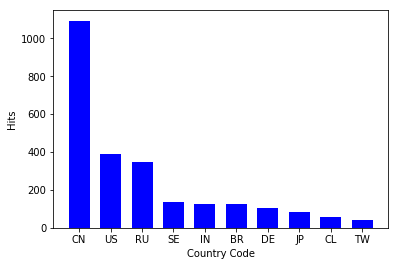

In [191]:
df2 = pd.read_csv('results.csv')
y = df2['city'].head(10)
x = df2['iso_code'].head(10)
width = 1/1.5
N = len(y)
plt.ylabel('Hits',rotation=90)
plt.xlabel('Country Code',rotation=0)
plt.bar(x,y,width,color="blue")


In [187]:
df2 = pd.read_csv('results.csv')
y = df2['city'].head(10)
x = df2['iso_code'].head(10)
width = 1/1.5
N = len(y)
plt.set_xlabel('fuck')
plt.bar(x,y,width,color="blue")


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'